# MINIMAX GAN
## Используется для синтеза сигналов для задачи бинарной классификации

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.utils import shuffle
import matplotlib
import random
import torch.autograd as autograd
#import torchsnooper

In [2]:
torch.manual_seed(111)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 1. Загрузка данных

In [3]:
data = pd.read_csv('/Users/zaret/Desktop/gerda/ANG5_cal.csv')

In [4]:
data.drop(data.columns[[0]], axis  = 1, inplace = True)

In [5]:
data

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,integral41,integral42,integral43,integral44,integral45,integral46,integral47,integral48,integral,label
0,0.140442,0.181663,0.209801,0.233267,0.253996,0.272972,0.290272,0.306565,0.322181,0.337019,...,0.488790,0.523117,0.562333,0.607231,0.659299,0.719679,0.790533,0.877341,0.486988,1
1,0.045344,0.081330,0.112907,0.140417,0.163945,0.185058,0.205364,0.225947,0.247246,0.269007,...,0.546343,0.567413,0.591851,0.620230,0.655396,0.702594,0.776821,0.883867,0.491816,0
2,0.038847,0.068367,0.092965,0.114875,0.136888,0.162010,0.192348,0.225346,0.258546,0.291481,...,0.515117,0.534861,0.556305,0.580297,0.608701,0.646127,0.703667,0.795487,0.486797,0
3,0.040791,0.058287,0.071423,0.082283,0.092036,0.101343,0.110134,0.118823,0.127419,0.135995,...,0.378054,0.409754,0.439973,0.470333,0.503177,0.542524,0.599320,0.781621,0.688840,0
4,0.060938,0.121147,0.198562,0.247046,0.276288,0.299460,0.320231,0.339979,0.359977,0.381197,...,0.487495,0.505984,0.527094,0.553221,0.588672,0.642007,0.766469,0.885732,0.429769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81597,0.138779,0.191703,0.233328,0.270243,0.302877,0.331684,0.358398,0.382190,0.404193,0.426089,...,0.438632,0.453070,0.468902,0.487386,0.511292,0.543149,0.598014,0.726106,0.425828,1
81598,0.028672,0.058089,0.087452,0.113082,0.136296,0.161095,0.195494,0.240446,0.272500,0.300394,...,0.583098,0.609487,0.637322,0.666869,0.699748,0.739970,0.794238,0.884338,0.465327,1
81599,0.033797,0.064744,0.093734,0.122582,0.157026,0.204316,0.243169,0.269953,0.292775,0.313781,...,0.422506,0.437654,0.454501,0.472952,0.493773,0.518713,0.552330,0.616205,0.511628,1
81600,0.029680,0.047934,0.061086,0.072907,0.081959,0.091011,0.099646,0.106860,0.114075,0.121290,...,0.265650,0.286738,0.308949,0.332515,0.360004,0.393349,0.440645,0.711360,0.742172,1


In [6]:
data = data.sort_values(by ='integral', ascending = 0)
data = data.reset_index()
data.drop(data.columns[[0]], axis  =1, inplace = True)

In [7]:
sig = data[data['label']==1]
bkg = data[data['label']==0]

In [8]:
sig = shuffle(sig)
bkg = shuffle(bkg)

Text(0.5, 1.0, 'ANG5')

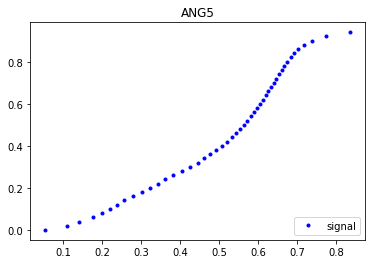

In [9]:
yList = [x*0.02 for x in range(48)] 
xList = sig.iloc[sig.shape[0]-1,:48]
plt.plot(xList,yList,'.', color='blue',
             label = 'signal')
plt.legend(loc = 'lower right')
plt.title('ANG5')

Text(0.5, 1.0, 'ANG5')

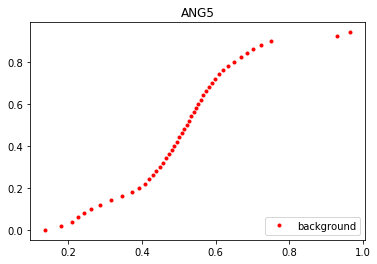

In [10]:
yList = [x*0.02 for x in range(48)] 
xList = bkg.iloc[101,:48]
plt.plot(xList,yList,'.', color='red',
             label = 'background')
plt.legend(loc = 'lower right')
plt.title('ANG5')

In [11]:
sig['derivative1']

59040    0.660287
79777    0.301375
65922    0.593806
58280    0.581720
73487    0.156981
           ...   
42486    0.816511
46391    0.358500
2455     0.605683
51549    0.236418
55147    0.373060
Name: derivative1, Length: 40801, dtype: float64

In [12]:
sig['TimeAtHeightX2']

59040    0.030290
79777    0.066362
65922    0.033681
58280    0.034381
73487    0.127404
           ...   
42486    0.024494
46391    0.055788
2455     0.033021
51549    0.084596
55147    0.053611
Name: TimeAtHeightX2, Length: 40801, dtype: float64

In [13]:
sig_diff = sig.loc[:]
bkg_diff = bkg.loc[:]

### В исходных данных избыточное число параметров, удаляем ненужные и разбиваем данные на 2 датасета: TimeAtHeightX[i]  и derivative[i] (derivative[i] изначально вычислялся из TimeAtHeightX[i])

In [14]:
sig = sig.drop('integral', axis = 1)
bkg = bkg.drop('integral', axis = 1)

sig_diff = sig_diff.drop('integral', axis = 1)
bkg_diff = bkg_diff.drop('integral', axis = 1)

In [15]:
for i in range (1,49):
    sig.drop('integral'+str(i), axis = 1, inplace = True)
    bkg.drop('integral'+str(i), axis = 1, inplace = True)
    
for i in range (1,49):
    sig_diff.drop('integral'+str(i), axis = 1, inplace = True)
    bkg_diff.drop('integral'+str(i), axis = 1, inplace = True)

In [16]:
for i in range (1,50):
    sig.drop('derivative'+str(i), axis = 1, inplace = True)
    bkg.drop('derivative'+str(i), axis = 1, inplace = True)

In [17]:
for i in range (2,50):
    sig_diff.drop('TimeAtHeightX'+str(i), axis = 1, inplace = True)
    bkg_diff.drop('TimeAtHeightX'+str(i), axis = 1, inplace = True)

In [18]:
sig = sig.drop('label', axis = 1)
bkg = bkg.drop('label', axis = 1)

sig_diff = sig_diff.drop('label', axis = 1)
bkg_diff = bkg_diff.drop('label', axis = 1)


sig_diff = sig_diff.drop('derivative49', axis = 1)
bkg_diff = bkg_diff.drop('derivative49', axis = 1)

In [19]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)

bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)

sig_diff = sig_diff.reset_index()
sig_diff.drop(sig_diff.columns[[0]], axis  =1, inplace = True)

bkg_diff = bkg_diff.reset_index()
bkg_diff.drop(bkg_diff.columns[[0]], axis  =1, inplace = True)

In [20]:
sig = sig.drop(index = 807)
sig_diff = sig_diff.drop(index = 807)

In [21]:
sig

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,TimeAtHeightX40,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49
0,0.030290,0.054795,0.076665,0.096808,0.116024,0.135080,0.154841,0.176189,0.199958,0.225920,...,0.748475,0.764259,0.780260,0.796567,0.813571,0.832004,0.853099,0.878414,0.910343,0.948812
1,0.066362,0.123557,0.190855,0.250633,0.290607,0.324371,0.353957,0.381136,0.406409,0.430799,...,0.799565,0.806814,0.814200,0.822041,0.830278,0.839920,0.851024,0.865065,0.884301,0.913536
2,0.033681,0.059203,0.082311,0.104404,0.126253,0.148632,0.172894,0.200333,0.231236,0.263105,...,0.762359,0.774149,0.786782,0.800478,0.815411,0.832361,0.852467,0.877371,0.908594,0.948342
3,0.034381,0.062560,0.088427,0.117800,0.152983,0.184015,0.215612,0.255559,0.286843,0.309273,...,0.691561,0.698735,0.706470,0.714680,0.724242,0.734977,0.747750,0.763427,0.783063,0.811576
4,0.127404,0.174371,0.210177,0.240648,0.265389,0.286300,0.304803,0.321917,0.338213,0.353921,...,0.767094,0.777964,0.789185,0.801497,0.815193,0.830411,0.848021,0.869399,0.896399,0.932585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.024494,0.042939,0.060029,0.078341,0.101029,0.130561,0.162063,0.194224,0.234410,0.265502,...,0.648665,0.655770,0.663330,0.671371,0.680206,0.690526,0.702377,0.716488,0.733502,0.755405
40797,0.055788,0.087925,0.113463,0.136038,0.156944,0.176666,0.195457,0.213240,0.230355,0.247033,...,0.680336,0.694818,0.709665,0.726843,0.746419,0.770520,0.802558,0.845005,0.892960,0.943722
40798,0.033021,0.051148,0.066862,0.077861,0.088861,0.098546,0.107070,0.115593,0.123883,0.131296,...,0.398531,0.413266,0.428786,0.445916,0.464147,0.485601,0.511239,0.543609,0.590727,0.679127
40799,0.084596,0.135552,0.172239,0.200567,0.222671,0.241705,0.259277,0.276261,0.293048,0.309611,...,0.636921,0.644475,0.652649,0.661191,0.670496,0.681016,0.692980,0.707910,0.729084,0.764783


In [22]:
bkg = bkg.drop(index = 807)
bkg_diff = bkg_diff.drop(index = 807)

In [23]:
bkg

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,TimeAtHeightX40,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49
0,0.042499,0.071177,0.094969,0.116286,0.136196,0.155198,0.173474,0.191091,0.208279,0.225065,...,0.559248,0.572002,0.586216,0.602046,0.619856,0.641314,0.669133,0.706642,0.762633,0.897096
1,0.046067,0.072991,0.094529,0.113913,0.131690,0.147986,0.163982,0.178927,0.193845,0.208027,...,0.622521,0.646043,0.671451,0.699071,0.728978,0.761032,0.795348,0.832252,0.872730,0.920359
2,0.102396,0.138643,0.173515,0.208588,0.235552,0.259687,0.286631,0.316866,0.342176,0.362880,...,0.780184,0.788640,0.797420,0.806843,0.817515,0.829614,0.844212,0.863083,0.890974,0.936634
3,0.042271,0.065194,0.083848,0.101154,0.118319,0.135605,0.152557,0.168590,0.183575,0.197770,...,0.581151,0.597873,0.616170,0.635632,0.656404,0.680439,0.710733,0.754989,0.827494,0.905677
4,0.025198,0.045380,0.063601,0.080948,0.097374,0.112901,0.127791,0.142311,0.156618,0.170782,...,0.550147,0.563531,0.577612,0.593233,0.611772,0.635348,0.665466,0.699355,0.732727,0.787745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.036966,0.066722,0.094116,0.118300,0.138651,0.156768,0.173619,0.189791,0.205609,0.221258,...,0.581580,0.590555,0.600121,0.610116,0.621641,0.634660,0.650612,0.673035,0.718073,0.873471
40797,0.041350,0.070795,0.096528,0.126175,0.160127,0.187177,0.210453,0.232595,0.253724,0.272294,...,0.647466,0.656323,0.665320,0.674635,0.684588,0.695202,0.706907,0.720663,0.738485,0.765342
40798,0.030775,0.053901,0.074461,0.094396,0.115275,0.138025,0.162618,0.186762,0.208664,0.230052,...,0.645813,0.655342,0.665352,0.676310,0.688736,0.702694,0.718740,0.737577,0.761033,0.793275
40799,0.041341,0.113550,0.165535,0.221658,0.253423,0.275500,0.295148,0.315447,0.336660,0.355605,...,0.627732,0.634524,0.641425,0.649341,0.657881,0.667779,0.680600,0.697967,0.724310,0.759419


In [24]:
sig_diff

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.660287,0.816145,0.914511,0.992887,1.040792,1.049557,1.012075,0.936891,0.841420,0.770343,...,1.293267,1.267140,1.249898,1.226505,1.176179,1.085033,0.948082,0.790040,0.626385,0.519903
1,0.301375,0.349684,0.297184,0.334576,0.500321,0.592337,0.676003,0.735878,0.791334,0.820008,...,2.800237,2.759044,2.708025,2.550448,2.428236,2.074266,1.801144,1.424331,1.039747,0.684117
2,0.593806,0.783629,0.865507,0.905280,0.915370,0.893678,0.824358,0.728882,0.647176,0.627587,...,1.735372,1.696458,1.583089,1.460256,1.339337,1.179951,0.994702,0.803088,0.640551,0.503180
3,0.581720,0.709749,0.773167,0.680914,0.568455,0.644497,0.632957,0.500668,0.639298,0.891679,...,2.862104,2.787579,2.585883,2.435897,2.091740,1.863034,1.565777,1.275740,1.018548,0.701436
4,0.156981,0.425833,0.558559,0.656368,0.808388,0.956395,1.080908,1.168677,1.227258,1.273230,...,1.976180,1.839949,1.782385,1.624379,1.460326,1.314194,1.135741,0.935515,0.740760,0.552699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.816511,1.084342,1.170292,1.092155,0.881512,0.677230,0.634891,0.621869,0.497687,0.643243,...,2.874042,2.815192,2.645379,2.487148,2.263823,1.938002,1.687621,1.417304,1.175518,0.913131
40797,0.358500,0.622344,0.783123,0.885939,0.956675,1.014113,1.064335,1.124637,1.168553,1.199231,...,1.445837,1.381020,1.347070,1.164297,1.021669,0.829832,0.624265,0.471171,0.417056,0.394003
40798,0.605683,1.103283,1.272803,1.818256,1.818256,2.064999,2.346414,2.346414,2.412660,2.698027,...,1.437527,1.357249,1.288679,1.167560,1.097015,0.932242,0.780079,0.617854,0.424471,0.226243
40799,0.236418,0.392499,0.545146,0.706024,0.904797,1.050742,1.138201,1.177533,1.191439,1.207507,...,2.699364,2.647755,2.446801,2.341194,2.149406,1.901157,1.671721,1.339555,0.944573,0.560229


In [25]:
bkg_diff

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.470594,0.697416,0.840625,0.938208,1.004495,1.052557,1.094293,1.135263,1.163594,1.191486,...,1.623312,1.568099,1.407135,1.263403,1.122944,0.932080,0.718924,0.533211,0.357197,0.148740
1,0.434147,0.742834,0.928607,1.031772,1.125068,1.227281,1.250272,1.338287,1.340660,1.410226,...,0.907656,0.850276,0.787156,0.724111,0.668733,0.623942,0.582832,0.541943,0.494099,0.419909
2,0.195319,0.551780,0.573524,0.570233,0.741722,0.828686,0.742271,0.661500,0.790186,0.966001,...,2.467838,2.365136,2.278101,2.122491,1.873931,1.653085,1.370049,1.059814,0.717075,0.438028
3,0.473137,0.872481,1.072143,1.155697,1.165134,1.157041,1.179786,1.247404,1.334689,1.409015,...,1.332231,1.196031,1.093092,1.027655,0.962819,0.832116,0.660196,0.451919,0.275845,0.255808
4,0.793724,0.990982,1.097615,1.152936,1.217575,1.288119,1.343129,1.377409,1.397936,1.412049,...,1.527463,1.494366,1.420296,1.280368,1.078815,0.848299,0.664069,0.590153,0.599305,0.363521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.541033,0.672142,0.730083,0.827011,0.982725,1.103946,1.186893,1.236684,1.264393,1.278040,...,2.320786,2.228244,2.090736,2.001126,1.735315,1.536170,1.253784,0.891939,0.444076,0.128701
40797,0.483679,0.679231,0.777207,0.674611,0.589058,0.739364,0.859277,0.903267,0.946557,1.077030,...,2.268047,2.258087,2.222974,2.147039,2.009446,1.884355,1.708611,1.453948,1.122177,0.744691
40798,0.649884,0.864806,0.972782,1.003255,0.957923,0.879084,0.813252,0.828382,0.913129,0.935135,...,2.280619,2.098942,1.997918,1.825224,1.609552,1.432793,1.246442,1.061759,0.852640,0.620316
40799,0.483782,0.276973,0.384725,0.356364,0.629625,0.905915,1.017883,0.985309,0.942818,1.055691,...,3.128333,2.944283,2.898197,2.526527,2.341994,2.020577,1.559913,1.151619,0.759212,0.569667


### Ток (в координатах derivative[i], TimeAtHeightX[i])

Text(0.5, 1.0, 'ANG5')

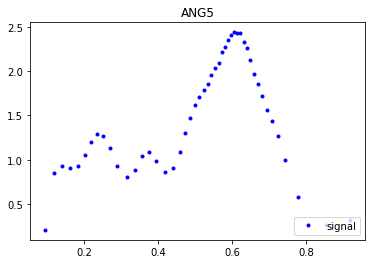

In [26]:
yList = sig_diff.iloc[101,:48]
xList = sig.iloc[101,:]
plt.plot(xList,yList,'.', color='blue',
             label = 'signal')
plt.legend(loc = 'lower right')
plt.title('ANG5')

Text(0.5, 1.0, 'ANG5')

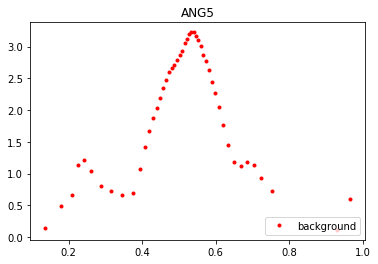

In [27]:
yList = bkg_diff.iloc[101,:48]
xList = bkg.iloc[101,:]
plt.plot(xList,yList,'.', color='red',
             label = 'background')
plt.legend(loc = 'lower right')
plt.title('ANG5')

In [30]:
sig1 = sig.loc[:]
bkg1 = bkg.loc[:]

In [31]:
sig = sig_diff.loc[:]  # переопределили для удобства, так как в дальнейшем будут использоваться только derivative[i]
bkg = bkg_diff.loc[:]

In [32]:
bkg

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.470594,0.697416,0.840625,0.938208,1.004495,1.052557,1.094293,1.135263,1.163594,1.191486,...,1.623312,1.568099,1.407135,1.263403,1.122944,0.932080,0.718924,0.533211,0.357197,0.148740
1,0.434147,0.742834,0.928607,1.031772,1.125068,1.227281,1.250272,1.338287,1.340660,1.410226,...,0.907656,0.850276,0.787156,0.724111,0.668733,0.623942,0.582832,0.541943,0.494099,0.419909
2,0.195319,0.551780,0.573524,0.570233,0.741722,0.828686,0.742271,0.661500,0.790186,0.966001,...,2.467838,2.365136,2.278101,2.122491,1.873931,1.653085,1.370049,1.059814,0.717075,0.438028
3,0.473137,0.872481,1.072143,1.155697,1.165134,1.157041,1.179786,1.247404,1.334689,1.409015,...,1.332231,1.196031,1.093092,1.027655,0.962819,0.832116,0.660196,0.451919,0.275845,0.255808
4,0.793724,0.990982,1.097615,1.152936,1.217575,1.288119,1.343129,1.377409,1.397936,1.412049,...,1.527463,1.494366,1.420296,1.280368,1.078815,0.848299,0.664069,0.590153,0.599305,0.363521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.541033,0.672142,0.730083,0.827011,0.982725,1.103946,1.186893,1.236684,1.264393,1.278040,...,2.320786,2.228244,2.090736,2.001126,1.735315,1.536170,1.253784,0.891939,0.444076,0.128701
40797,0.483679,0.679231,0.777207,0.674611,0.589058,0.739364,0.859277,0.903267,0.946557,1.077030,...,2.268047,2.258087,2.222974,2.147039,2.009446,1.884355,1.708611,1.453948,1.122177,0.744691
40798,0.649884,0.864806,0.972782,1.003255,0.957923,0.879084,0.813252,0.828382,0.913129,0.935135,...,2.280619,2.098942,1.997918,1.825224,1.609552,1.432793,1.246442,1.061759,0.852640,0.620316
40799,0.483782,0.276973,0.384725,0.356364,0.629625,0.905915,1.017883,0.985309,0.942818,1.055691,...,3.128333,2.944283,2.898197,2.526527,2.341994,2.020577,1.559913,1.151619,0.759212,0.569667


## 2. Подготовка
### Все следующие шаги осуществляются отдельно для sig/bkg

In [33]:
print ('input sig/bkg')
name = input()

if (name=='sig'):
    line = 'signal'
if (name == 'bkg'):
    line = 'background'

input sig/bkg
bkg


In [34]:
if (name=='sig'):
    arr = np.array(sig)
if (name == 'bkg'):
    arr = np.array(bkg)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(arr) 

In [36]:
arr.shape

(40800, 48)

In [37]:
train_data_length = arr.shape[0]
train_data = torch.zeros((train_data_length,48))
train_data = torch.tensor(arr, dtype=torch.float)
train_labels = torch.zeros(train_data_length,1)

train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [38]:
train_data.shape

torch.Size([40800, 48])

In [39]:
train_labels.shape

torch.Size([40800, 1])

In [40]:
def batch(number):
    A=[]
    if (number <100):
        k = int(number/2)
    else:
        k = 110
    for i in range (1,k):
        if (number%i == 0):
            A.append(i)
            
    print(A[len(A)-1])
    return A[len(A)-1]

In [41]:
batch_size = 102

In [42]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, drop_last=True
)

In [43]:
train_loader

## 3. Discriminator

In [44]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(48, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        output = torch.sigmoid(self.model(x))
        return output

In [45]:
netD = Discriminator()

In [46]:
print(netD)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=48, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


## 4. Generator

In [47]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fcnet = nn.Sequential(
            torch.nn.Linear(24, 28),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(28, 36),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(36, 40),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(40, 44),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(44, 48),
        )
        
    # @torchsnooper.snoop()
    def forward(self, inputs):
        x = self.fcnet(inputs)
        return x

In [48]:
netG = Generator()

In [49]:
print(netG)

Generator(
  (fcnet): Sequential(
    (0): Linear(in_features=24, out_features=28, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=28, out_features=36, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=36, out_features=40, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=40, out_features=44, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=44, out_features=48, bias=True)
  )
)


## 5. Обучение

In [50]:
lr = 1e-4
num_epochs = 300
criterion = nn.BCELoss()

In [51]:
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr)
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr)
loss_G=[]
loss_D=[]
epochs = []

G_losses = []
D_losses = []

real_label = 1.
fake_label = 0.

In [52]:
import time
start_time = time.time()
for epoch in range(num_epochs):
    epochs.append(epoch)
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator       
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 24))
        
        generated_samples = netG(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        
        ## training the discriminator
        netD.zero_grad()
        output_discriminator = netD(all_samples)
        errD = criterion(output_discriminator, all_samples_labels)
        errD.backward()
        optimizerD.step()
        
        ## training the generator
        latent_space_samples = torch.randn(batch_size, 24)
        netG.zero_grad()
        generated_samples = netG(latent_space_samples)
        outputDG = netD(generated_samples)
        errG = criterion(outputDG, real_samples_labels) #########
        errG.backward()
        optimizerG.step()
        
        G_losses.append(errG.item()) # по итерациям 
        D_losses.append(errD.item())
    
    
        # Show loss
        if (epoch % 5 == 0 and n == batch_size - 1):
            print(f"Epoch{epoch} Loss D.: {errD}" "||" 
              f"Loss G.: {errG}")
        #print(n)
        if (n == batch_size-1):
            loss_D.append(errD.item()) # очень грубо 
            loss_G.append(errG.item())

Epoch0 Loss D.: 0.5167966485023499||Loss G.: 0.6671246290206909
Epoch5 Loss D.: 0.02387356013059616||Loss G.: 4.859560012817383
Epoch10 Loss D.: 0.015094894915819168||Loss G.: 6.516151428222656
Epoch15 Loss D.: 0.050635240972042084||Loss G.: 5.580039978027344
Epoch20 Loss D.: 0.06570681184530258||Loss G.: 3.8401548862457275
Epoch25 Loss D.: 0.1507599800825119||Loss G.: 2.811817169189453
Epoch30 Loss D.: 0.3225726783275604||Loss G.: 2.110694408416748
Epoch35 Loss D.: 0.22632679343223572||Loss G.: 2.5130460262298584
Epoch40 Loss D.: 0.3290879428386688||Loss G.: 1.729293942451477
Epoch45 Loss D.: 0.36684250831604004||Loss G.: 1.5595388412475586
Epoch50 Loss D.: 0.5218846797943115||Loss G.: 1.0763579607009888
Epoch55 Loss D.: 0.5039542317390442||Loss G.: 1.2414010763168335
Epoch60 Loss D.: 0.4545269310474396||Loss G.: 1.4852005243301392
Epoch65 Loss D.: 0.34970104694366455||Loss G.: 1.6199703216552734
Epoch70 Loss D.: 0.46487370133399963||Loss G.: 1.4643759727478027
Epoch75 Loss D.: 0.4452

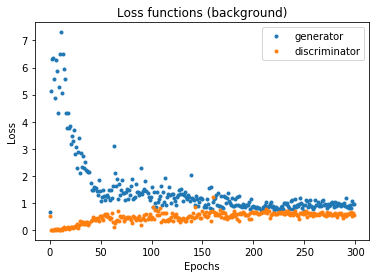

In [53]:
plt.plot(epochs, loss_G, '.', label='generator')
plt.plot(epochs, loss_D, '.',  label='discriminator')
plt.title('Loss functions ('+line+')')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

C:\Users\zaret\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


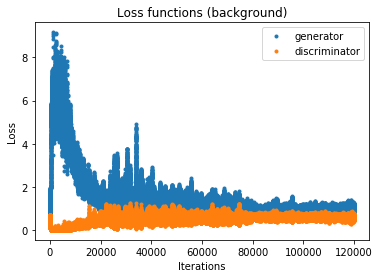

In [54]:
plt.plot(G_losses, '.', label='generator')
plt.plot(D_losses, '.',  label='discriminator')
plt.title('Loss functions ('+line+')')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [55]:
torch.save(netG.state_dict(), 'model_' +name+'.pth')

In [57]:
netG.load_state_dict(torch.load('model_' +name+'.pth'))

<All keys matched successfully>

In [58]:
latent_space_samples = torch.randn(100, 24).to(DEVICE)  ### generator after all epochs
generated_samples = netG(latent_space_samples)

In [59]:
generated_samples = scaler.inverse_transform(generated_samples.cpu().data.numpy())

##  6. Синтез данных и их сохранение в file.csv

In [62]:
generator = Generator()

In [63]:
generator.load_state_dict(torch.load('model_' +name+'.pth'))

<All keys matched successfully>

In [65]:
latent_space_samples = torch.randn(60000, 24)
generated_samples = generator(latent_space_samples)

In [66]:
generated_samples.shape

torch.Size([60000, 48])

In [67]:
generated_samples = generated_samples.detach()

In [68]:
generated_samples = scaler.inverse_transform(generated_samples)

In [69]:
generated_samples = np.array(generated_samples)

In [70]:
generated_samples

array([[0.83827424, 0.9633697 , 1.1188455 , ..., 1.2191057 , 0.9386001 ,
        0.49971232],
       [0.74994767, 1.4053764 , 1.7572374 , ..., 1.1727123 , 0.99958324,
        0.357541  ],
       [0.6103317 , 0.9782806 , 1.2577496 , ..., 0.6340147 , 0.55163044,
        0.2548136 ],
       ...,
       [0.70891964, 0.7614755 , 0.8977862 , ..., 0.77197933, 0.4806133 ,
        0.36289608],
       [0.67521   , 0.9444606 , 1.169309  , ..., 0.55342686, 0.52306175,
        0.39990762],
       [0.4082005 , 0.8151441 , 1.0470216 , ..., 0.7965785 , 0.5996627 ,
        0.30632228]], dtype=float32)

In [71]:
def currentToCharge(diff):# обратное преобразование derivative -> TimeAtHeightX
    A = []
    for i in range(diff.shape[0]):
        if i % 5000 == 0:
            print(5000)
        x1 = 0
        B = []
        for j in range(48):
            #print('der = ', diff[i][j])
            x = 0.02 / (diff[i][j]) + x1
            B.append(x)
            x1 = x
            #print('TAX= ', x)
        A.append(B)
    A = np.array(A)
    return A

In [72]:
generated_samples1 = currentToCharge(generated_samples)

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [73]:
generated_samples1

array([[0.02385854, 0.044619  , 0.06249457, ..., 0.67086894, 0.69217727,
        0.7322003 ],
       [0.02666853, 0.04089959, 0.05228109, ..., 0.72876137, 0.74876971,
        0.80470735],
       [0.03276907, 0.0532131 , 0.06911451, ..., 0.65671699, 0.69297315,
        0.77146189],
       ...,
       [0.02821194, 0.05447674, 0.07675376, ..., 0.74710434, 0.78871784,
        0.84383003],
       [0.02962041, 0.05079652, 0.06790064, ..., 0.79533039, 0.83356679,
        0.88357834],
       [0.04899553, 0.07353107, 0.09263287, ..., 0.77584485, 0.80919694,
        0.87448765]])

In [75]:
def form_names(h):
    B = []
    C=[]
    D=[]
    s = 'TimeAtHeightX'
    p='derivative'
    t = 'integral'
    for i in range(h):
        s1 = s+str(i+1)
        B.append(s1)
    for j in range(h-1):
        p1 = p+str(j)
        C.append(p1)
    
    for k in range(h-2):
        t1 = t+str(k+1)
        D.append(t1)
    return B, C, D

In [76]:
def torch_dataframes_cur(samples):
    _,A,_ = form_names(50)
    df = pd.DataFrame()

    for i in range (48):################
        tmp = []
        for j in range (samples.shape[0]):
            tmp.append(samples[j][i])
        df[A[i - 48]] = tmp
    return df

In [77]:
def torch_dataframes_ch(samples):
    #samples = samples.detach().numpy()
    A,_,_ = form_names(50)
    zeros = [0 for x in range (samples.shape[0])]
    ones = [1 for x in range (samples.shape[0])]
    df = pd.DataFrame()
    df[A[0]] = zeros

    for i in range (48): ##########
        tmp = []
        for j in range (samples.shape[0]):
            tmp.append(samples[j][i])
        df[A[i+1]] = tmp
    df[A[49]] = ones
    return df

In [78]:
samples1 = torch_dataframes_cur(generated_samples)
samples2 = torch_dataframes_ch(generated_samples1)

In [79]:
samples2

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49,TimeAtHeightX50
0,0,0.023859,0.044619,0.062495,0.079217,0.095429,0.113411,0.132626,0.151980,0.171468,...,0.592520,0.603109,0.614186,0.626129,0.639769,0.654463,0.670869,0.692177,0.732200,1
1,0,0.026669,0.040900,0.052281,0.062268,0.071800,0.081810,0.092163,0.102408,0.112209,...,0.602684,0.630989,0.655340,0.676620,0.694632,0.711707,0.728761,0.748770,0.804707,1
2,0,0.032769,0.053213,0.069115,0.082528,0.094855,0.107039,0.118783,0.130041,0.140515,...,0.484461,0.508729,0.535361,0.563806,0.593703,0.625172,0.656717,0.692973,0.771462,1
3,0,0.055085,0.078444,0.093737,0.106287,0.117434,0.128306,0.138792,0.149036,0.158411,...,0.449424,0.474780,0.502403,0.532319,0.562366,0.589342,0.613716,0.637436,0.670541,1
4,0,0.027695,0.048869,0.066450,0.082341,0.097291,0.111993,0.126151,0.140064,0.153483,...,0.537101,0.552045,0.568050,0.586258,0.607252,0.631987,0.661815,0.702519,0.775594,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.294314,0.324724,0.345152,0.362187,0.377647,0.392270,0.407386,0.422496,0.437550,...,0.766644,0.776765,0.787484,0.799923,0.815640,0.834665,0.859605,0.897442,1.005048,1
59996,0,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,...,0.451851,0.485193,0.519943,0.564228,0.613157,0.668433,0.718536,0.762816,0.815186,1
59997,0,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,...,0.657559,0.667250,0.677064,0.688689,0.702875,0.721197,0.747104,0.788718,0.843830,1
59998,0,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,...,0.607244,0.633785,0.660762,0.692068,0.724265,0.759192,0.795330,0.833567,0.883578,1


In [80]:
samples1

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.838274,0.963370,1.118845,1.196017,1.233630,1.112221,1.040846,1.033399,1.026246,1.004511,...,2.088145,1.897636,1.888686,1.805619,1.674654,1.466247,1.361048,1.219106,0.938600,0.499712
1,0.749948,1.405376,1.757237,2.002609,2.098203,1.998011,1.931877,1.952111,2.040507,2.210021,...,0.678692,0.457736,0.706602,0.821297,0.939876,1.110341,1.171321,1.172712,0.999583,0.357541
2,0.610332,0.978281,1.257750,1.491019,1.622536,1.641379,1.703006,1.776639,1.909440,1.979984,...,1.124353,0.858782,0.824127,0.750994,0.703108,0.668947,0.635555,0.634015,0.551630,0.254814
3,0.363075,0.856208,1.307774,1.593660,1.794222,1.839458,1.907362,1.952427,2.133342,2.181733,...,1.274457,0.990062,0.788794,0.724011,0.668551,0.665613,0.741406,0.820567,0.843137,0.604139
4,0.722139,0.944585,1.137609,1.258547,1.337823,1.360341,1.412643,1.437442,1.490443,1.503549,...,1.562915,1.437054,1.338380,1.249572,1.098450,0.952636,0.808585,0.670493,0.491357,0.273691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.067955,0.657669,0.979073,1.174007,1.293690,1.367707,1.323124,1.323556,1.328579,1.334841,...,2.388683,2.090985,1.976014,1.865978,1.607805,1.272524,1.051249,0.801918,0.528583,0.185863
59996,0.708722,1.243961,1.644722,1.991430,2.192399,2.238777,2.370175,2.429364,2.581256,2.649087,...,0.994247,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891
59997,0.708920,0.761476,0.897786,0.881805,0.829687,0.746498,0.692413,0.564870,0.608110,0.731669,...,2.273998,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896
59998,0.675210,0.944461,1.169309,1.345057,1.461010,1.477300,1.560503,1.619075,1.693607,1.698685,...,0.959059,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908


In [81]:
def adding(data1, data2): # склеивание
    data_tmp1 = data1.loc[:]
    data_tmp2 = data2.loc[:]
    for i in range(1, 49):
        data_tmp1.loc[:,"derivative" + str(i)] = data_tmp2['derivative'+str(i)]
    return data_tmp1

In [82]:
samples = adding(samples2, samples1)

In [83]:
samples

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.023859,0.044619,0.062495,0.079217,0.095429,0.113411,0.132626,0.151980,0.171468,...,2.088145,1.897636,1.888686,1.805619,1.674654,1.466247,1.361048,1.219106,0.938600,0.499712
1,0,0.026669,0.040900,0.052281,0.062268,0.071800,0.081810,0.092163,0.102408,0.112209,...,0.678692,0.457736,0.706602,0.821297,0.939876,1.110341,1.171321,1.172712,0.999583,0.357541
2,0,0.032769,0.053213,0.069115,0.082528,0.094855,0.107039,0.118783,0.130041,0.140515,...,1.124353,0.858782,0.824127,0.750994,0.703108,0.668947,0.635555,0.634015,0.551630,0.254814
3,0,0.055085,0.078444,0.093737,0.106287,0.117434,0.128306,0.138792,0.149036,0.158411,...,1.274457,0.990062,0.788794,0.724011,0.668551,0.665613,0.741406,0.820567,0.843137,0.604139
4,0,0.027695,0.048869,0.066450,0.082341,0.097291,0.111993,0.126151,0.140064,0.153483,...,1.562915,1.437054,1.338380,1.249572,1.098450,0.952636,0.808585,0.670493,0.491357,0.273691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.294314,0.324724,0.345152,0.362187,0.377647,0.392270,0.407386,0.422496,0.437550,...,2.388683,2.090985,1.976014,1.865978,1.607805,1.272524,1.051249,0.801918,0.528583,0.185863
59996,0,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,...,0.994247,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891
59997,0,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,...,2.273998,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896
59998,0,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,...,0.959059,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908


In [84]:
samples.to_csv('simulated_'+line+'.csv')

In [85]:
print ('simulated_'+line+'.csv')

simulated_background.csv


## 7. Отбор и сохранение
### Это шаг осуществляется после предыщего для sig и bkg

### 7.1. Отбор для sig

In [86]:
sig = pd.read_csv('simulated_signal.csv')
sig.drop(sig.columns[[0]], axis  =1, inplace = True)

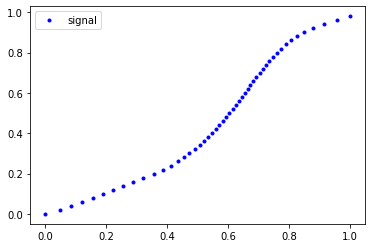

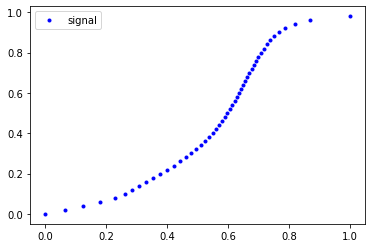

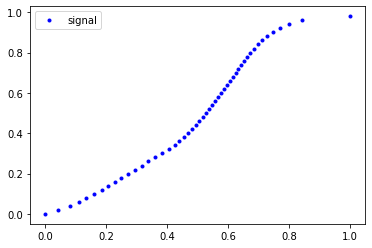

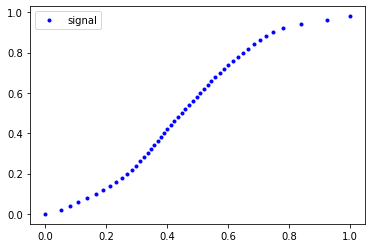

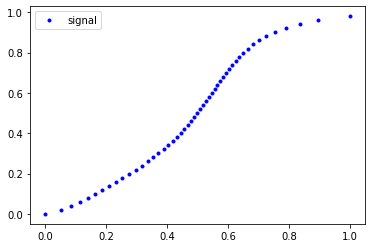

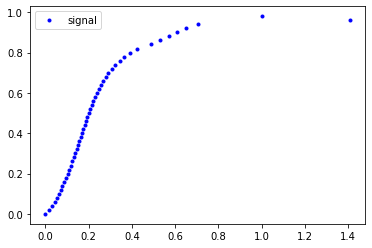

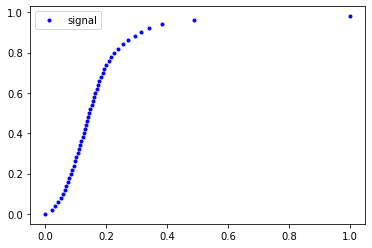

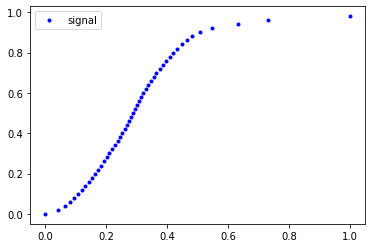

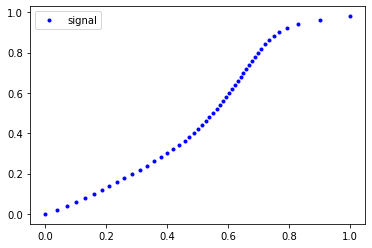

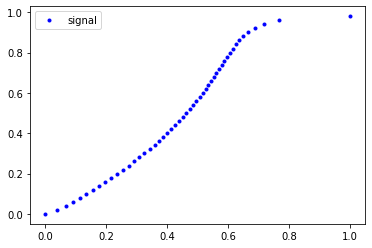

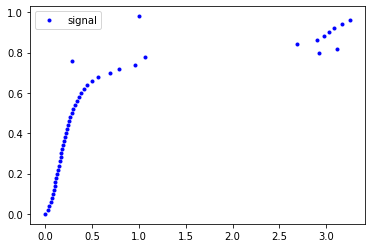

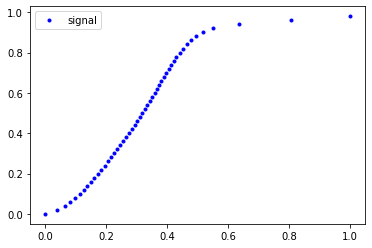

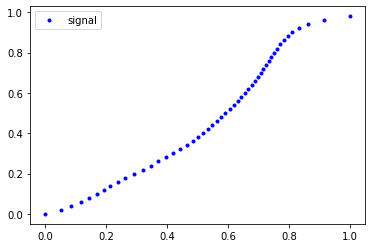

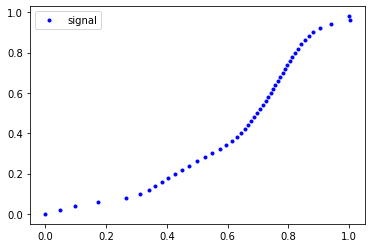

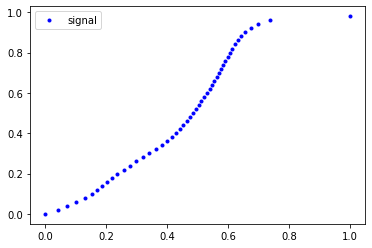

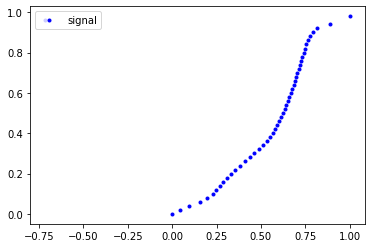

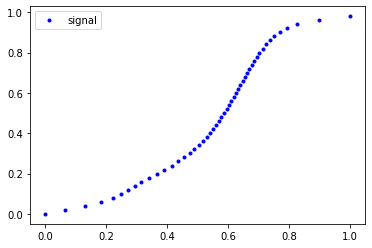

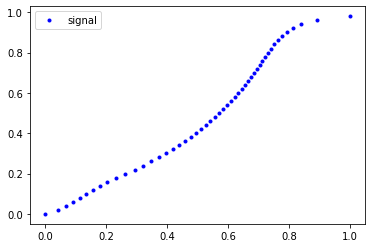

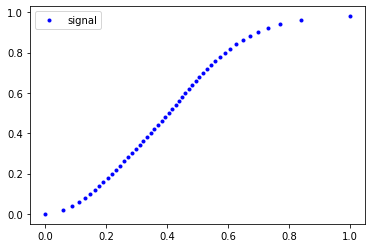

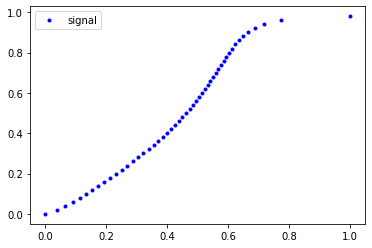

In [87]:
y = [x*0.02 for x in range(50)]
xList = np.array(sig.iloc[:,:50])
for i in range(20):
    plt.plot(xList[i],y, '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

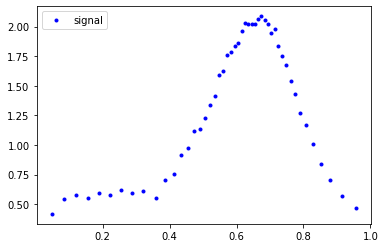

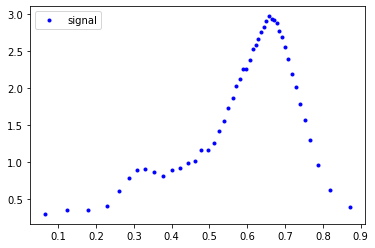

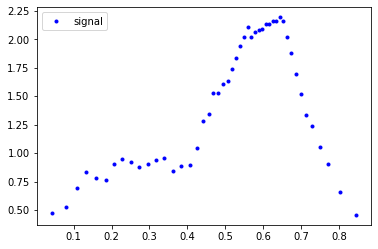

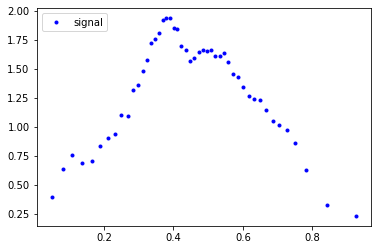

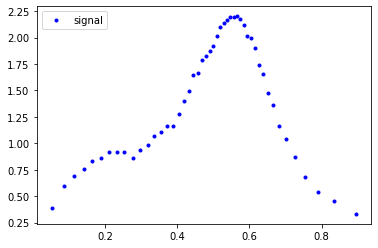

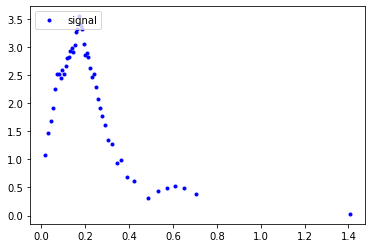

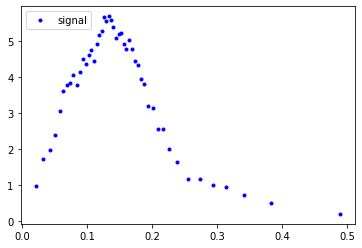

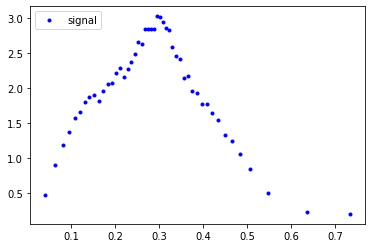

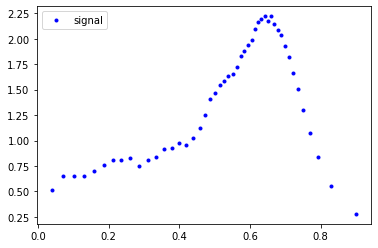

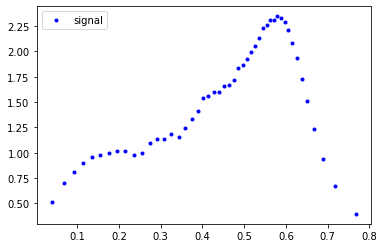

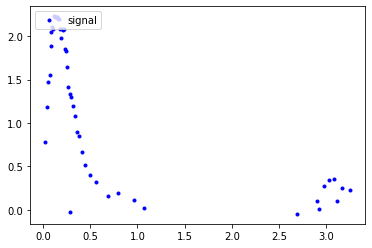

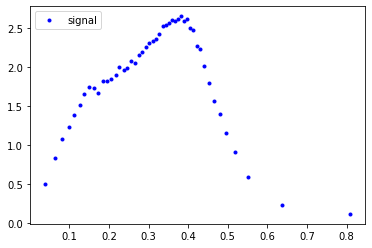

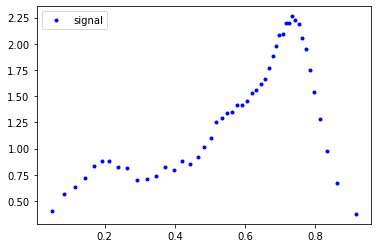

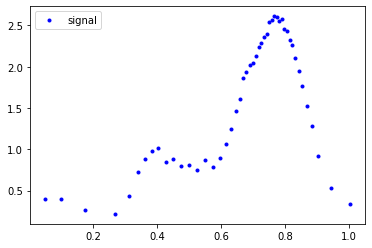

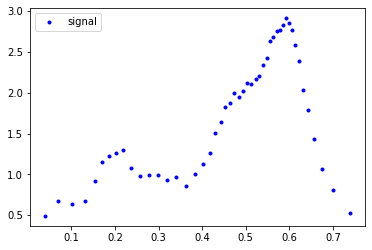

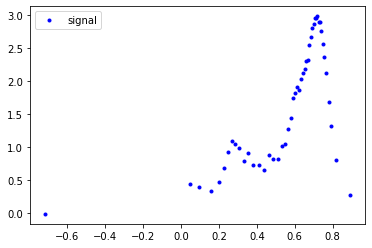

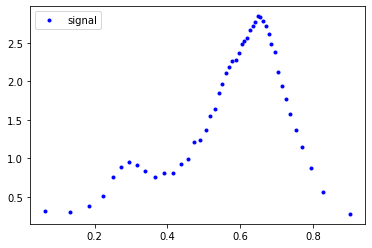

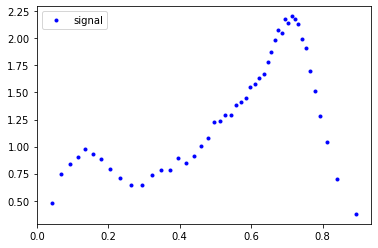

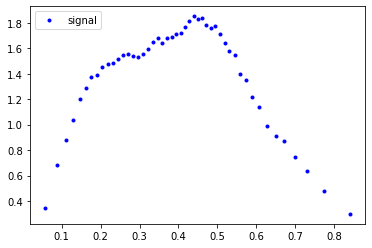

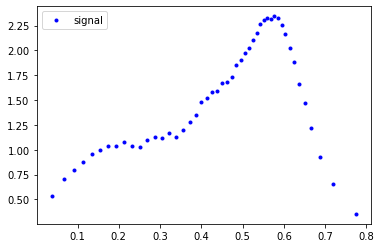

In [88]:
y = np.array(sig.iloc[:,50:])
xList = np.array(sig.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

In [89]:
sig

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.047859,0.084551,0.119299,0.155299,0.188761,0.223149,0.255443,0.288945,0.321843,...,1.678901,1.540579,1.430623,1.270883,1.167746,1.011350,0.843084,0.706976,0.570329,0.470712
1,0,0.066097,0.122598,0.178579,0.227855,0.260765,0.286020,0.308475,0.330446,0.353333,...,2.558959,2.390753,2.195069,2.012476,1.793677,1.571206,1.298550,0.967746,0.624266,0.389749
2,0,0.042451,0.080758,0.109641,0.133549,0.159071,0.185241,0.207271,0.228389,0.250128,...,2.019138,1.877956,1.696454,1.521908,1.332911,1.236557,1.057073,0.906059,0.655561,0.456230
3,0,0.050162,0.081531,0.107799,0.136899,0.165083,0.188978,0.211104,0.232359,0.250481,...,1.245029,1.235579,1.150491,1.049673,1.021887,0.971848,0.864543,0.629699,0.330931,0.235175
4,0,0.051562,0.084981,0.113827,0.140121,0.164231,0.187563,0.209352,0.231103,0.252877,...,1.658796,1.478314,1.358085,1.159338,1.038692,0.872182,0.683760,0.543124,0.450250,0.332624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.027269,0.048969,0.068839,0.088198,0.105897,0.121670,0.136754,0.151534,0.166206,...,1.477340,1.357385,1.235906,1.025311,0.915999,0.789007,0.639984,0.534774,0.414365,0.260851
59996,0,0.022876,0.037024,0.049384,0.059634,0.068046,0.075494,0.082750,0.089774,0.096468,...,1.554850,1.265489,1.088878,0.747134,0.781718,0.701293,0.655485,0.489917,0.344269,0.182551
59997,0,0.035293,0.060563,0.082555,0.103139,0.124580,0.147141,0.167994,0.188909,0.209982,...,1.934593,1.892303,1.796225,1.648870,1.468336,1.287981,1.013588,0.779959,0.483125,0.249809
59998,0,0.038416,0.056448,0.070853,0.084094,0.095651,0.105939,0.116174,0.126183,0.135664,...,1.052851,1.000960,0.958162,0.834115,0.830758,0.912148,0.866198,0.778800,0.607549,0.291010


In [90]:
for i in range(1, 51):
    sig = sig[(sig['TimeAtHeightX' + str(i)] <= 1)]
    sig = sig[(sig['TimeAtHeightX' + str(i)] >= 0)]


In [91]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)
sig.shape

(52094, 98)

In [92]:
sig1 = sig.iloc[:,:50] # отбор из физических соображений 
yList = [x*0.02 for x in range(50)]
k = 0
for i in range(sig1.shape[0]):
    try:
        if auc(sig1.iloc[i,:], yList) > 0.9 or auc(sig1.iloc[i,:], yList) < 0.1 :
            sig = sig.drop(index=[i])
    except ValueError:
        sig = sig.drop(index=[i])
        print(i, end = ', ')
        k+=1
print('k = ', k)

35, 128, 212, 375, 393, 562, 651, 661, 793, 873, 914, 1028, 1092, 1102, 1510, 1666, 1759, 1783, 1803, 1880, 1950, 2053, 2136, 2155, 2221, 2340, 2378, 2494, 2531, 2607, 2616, 2902, 2952, 3083, 3246, 3248, 3251, 3302, 3457, 3569, 3758, 3878, 3967, 3997, 4071, 4156, 4518, 4600, 4634, 4705, 4706, 4798, 4829, 4915, 4929, 4964, 5017, 5349, 5405, 5412, 5580, 5604, 5642, 5984, 6024, 6280, 6352, 6416, 6417, 6477, 6520, 6572, 6832, 6836, 6963, 6982, 6988, 7192, 7288, 7553, 7556, 7709, 7846, 8156, 8187, 8364, 8550, 8756, 8811, 8841, 9003, 9043, 9052, 9400, 9417, 9515, 9532, 9649, 9835, 9875, 9914, 10030, 10085, 10118, 10602, 10648, 10795, 10869, 10949, 11124, 11601, 11819, 11877, 12730, 12731, 13072, 13167, 13268, 13325, 13468, 13653, 13674, 13770, 13877, 14217, 14300, 14522, 14749, 14912, 15012, 15174, 15241, 15271, 15375, 15395, 15504, 15551, 15710, 15885, 16214, 16341, 16364, 16528, 16657, 16693, 16703, 16858, 16983, 17159, 17341, 17447, 17492, 17630, 17753, 17754, 17834, 17965, 18004, 18019, 

In [93]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)
sig.shape

(51633, 98)

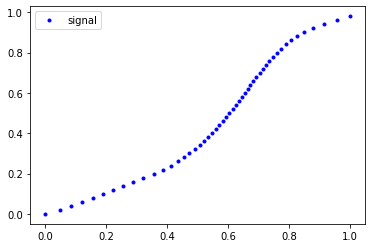

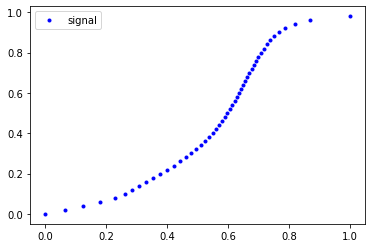

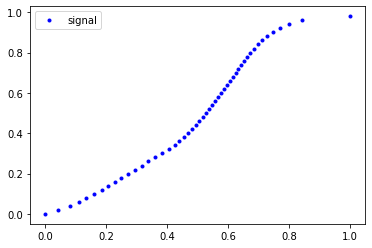

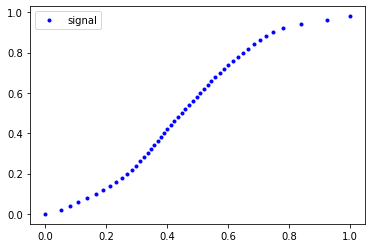

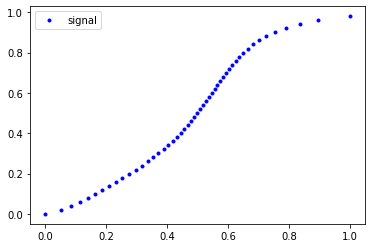

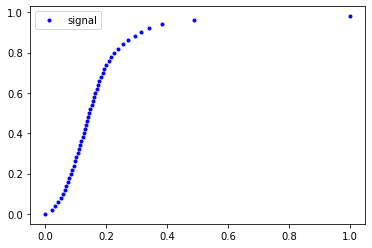

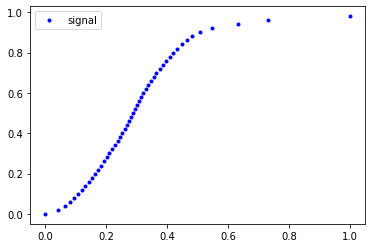

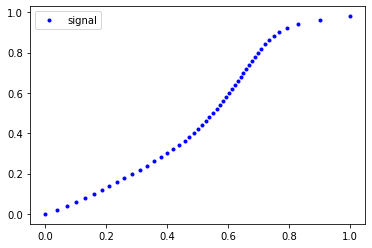

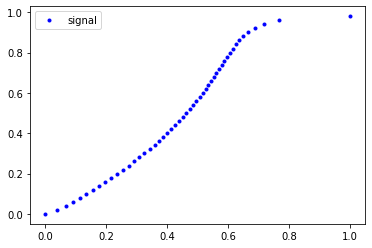

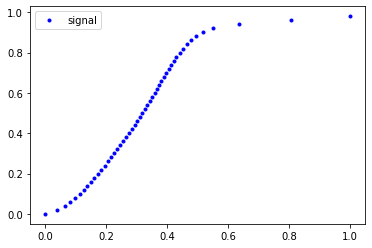

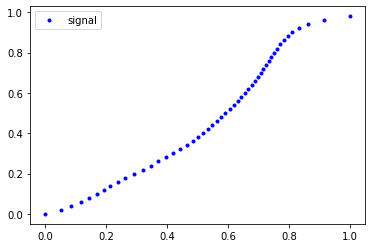

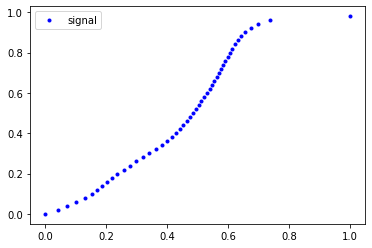

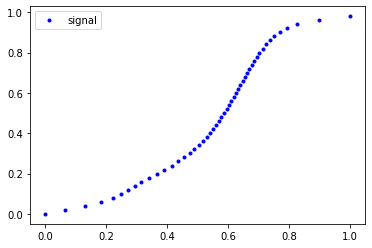

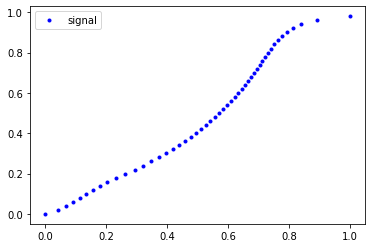

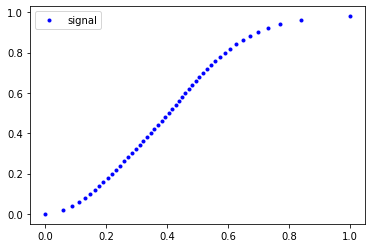

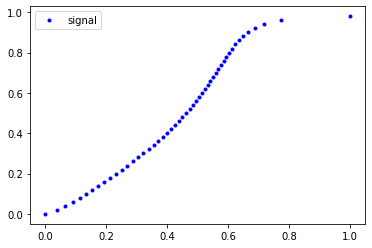

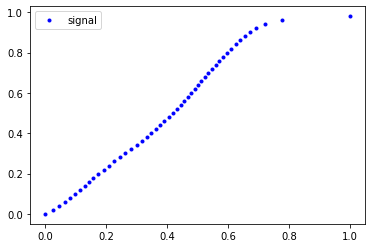

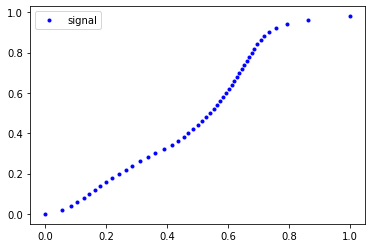

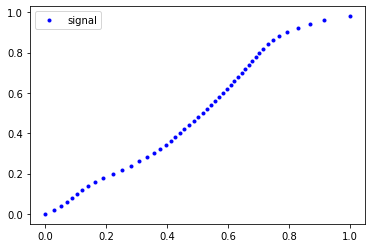

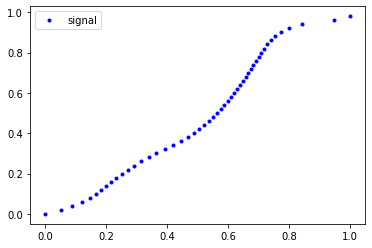

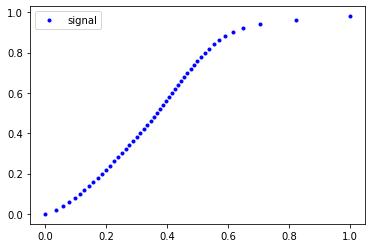

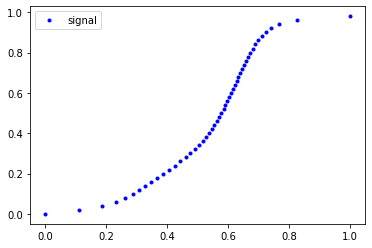

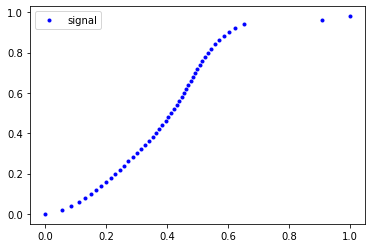

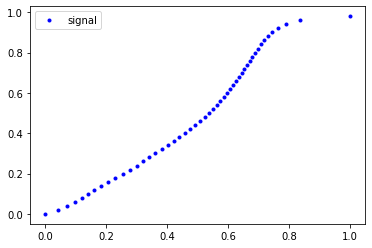

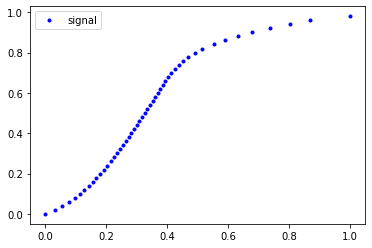

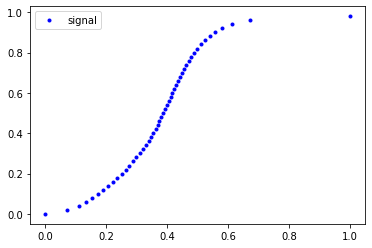

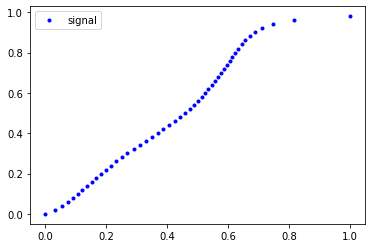

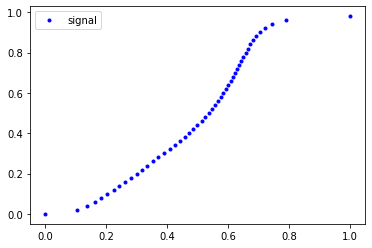

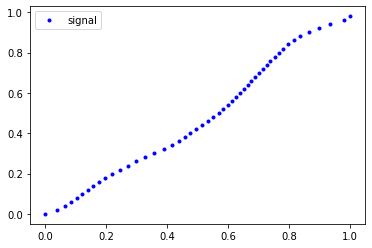

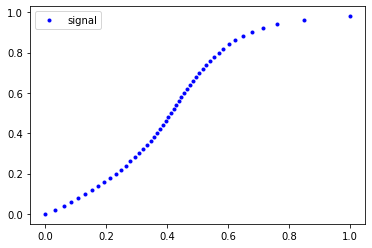

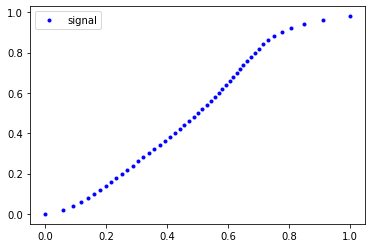

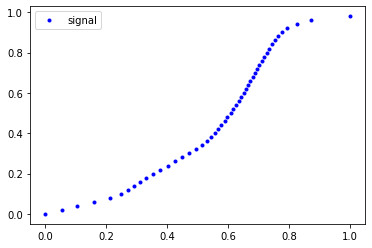

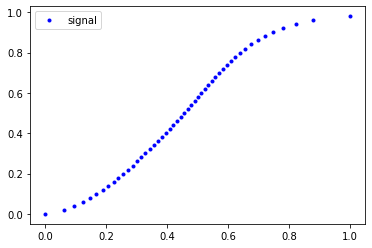

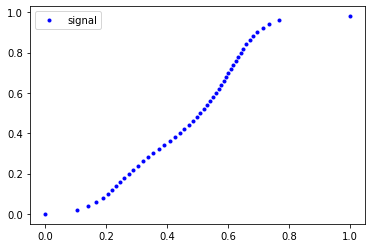

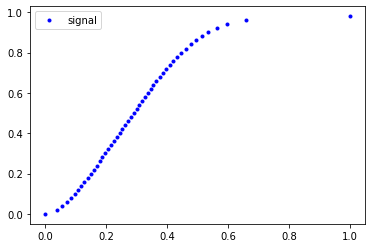

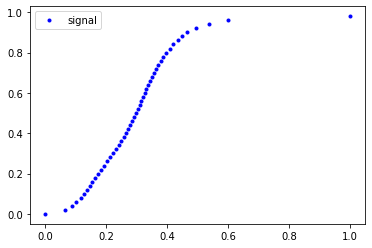

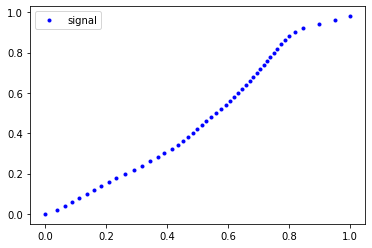

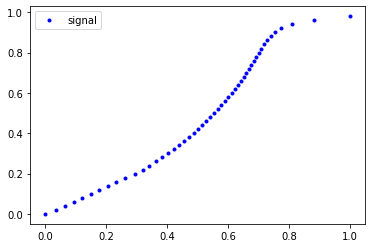

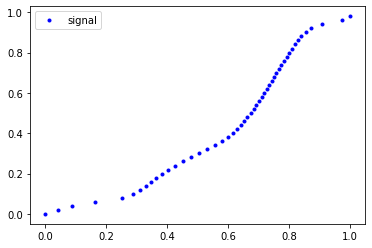

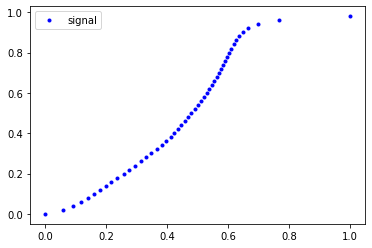

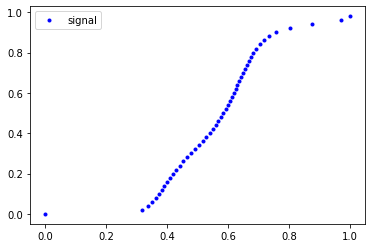

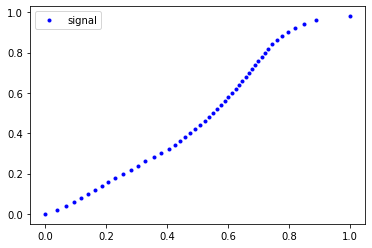

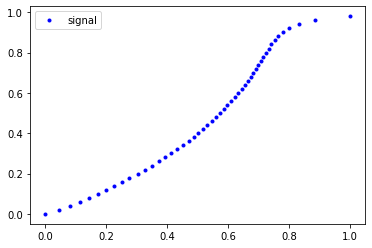

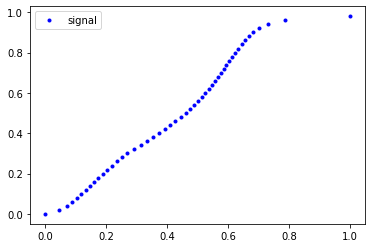

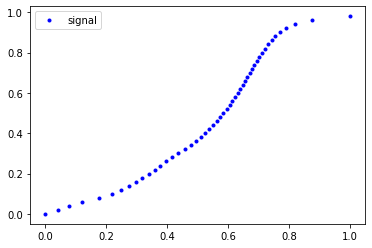

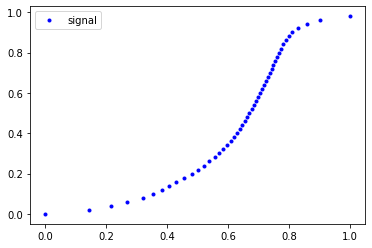

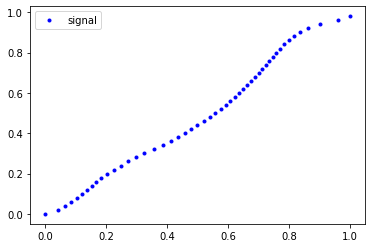

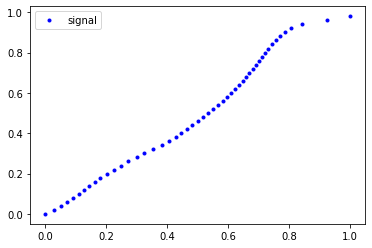

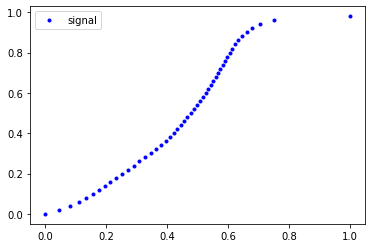

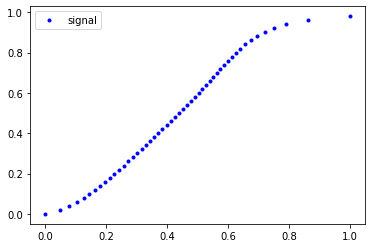

In [95]:
y = [x*0.02 for x in range(50)]
xList = np.array(sig.iloc[:,:50])
for i in range(50):
    plt.plot(xList[i],y, '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

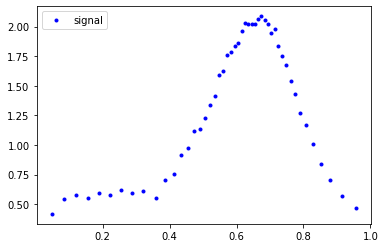

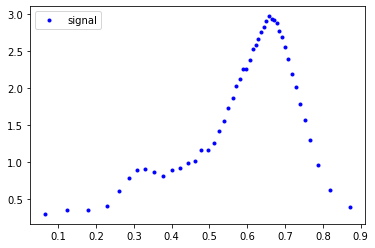

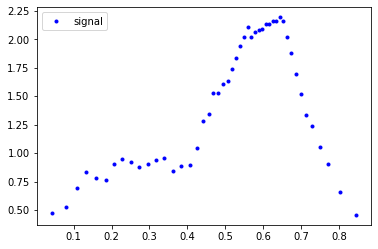

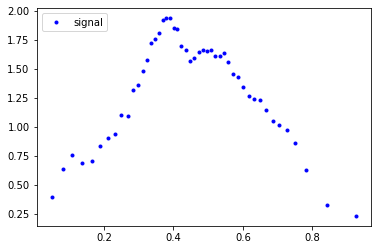

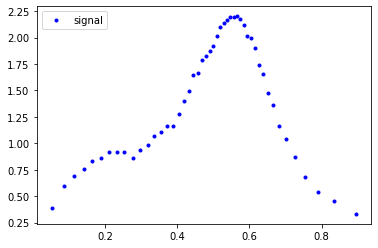

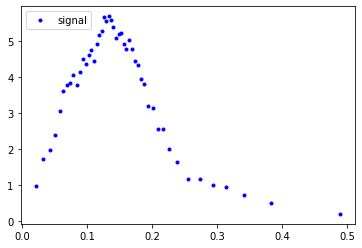

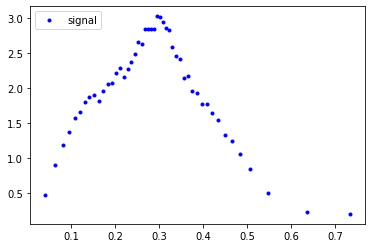

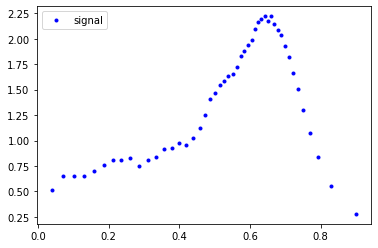

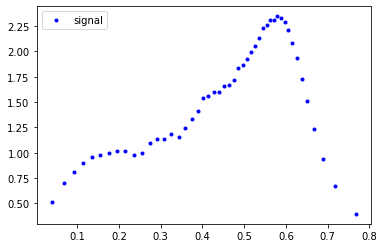

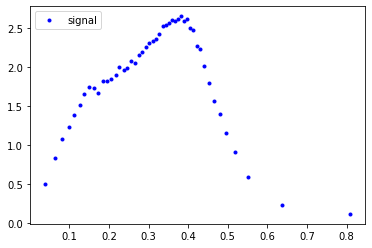

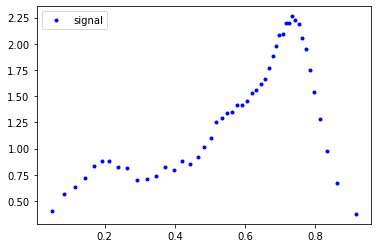

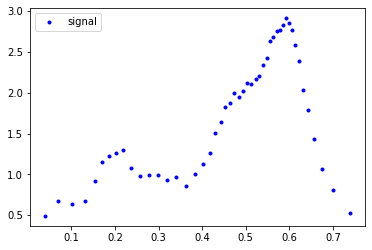

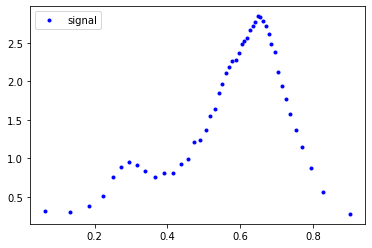

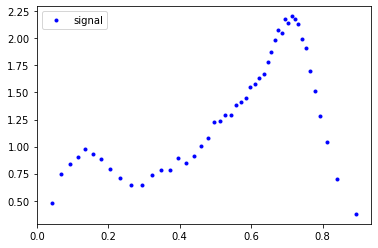

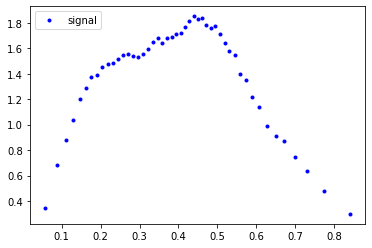

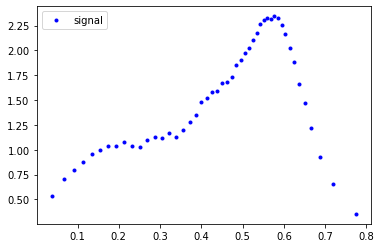

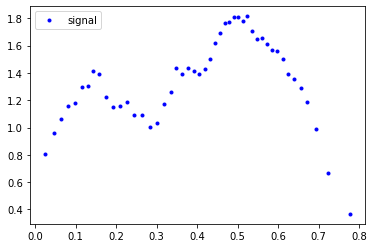

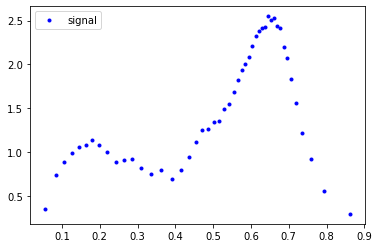

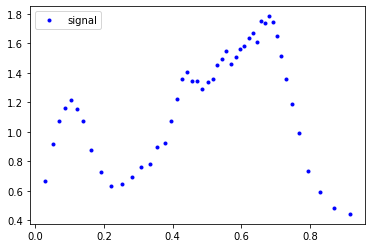

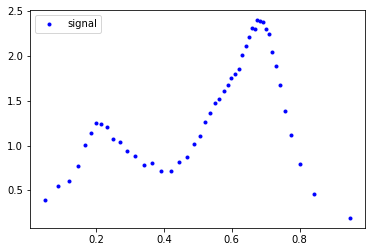

In [96]:
y = np.array(sig.iloc[:,50:])
xList = np.array(sig.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

осталось  51633
осталось  46633
осталось  41633
осталось  36633
осталось  31633
осталось  26633
осталось  21633
осталось  16633
осталось  11633
осталось  6633
осталось  1633


Text(0.5, 1.0, 'ANG5')

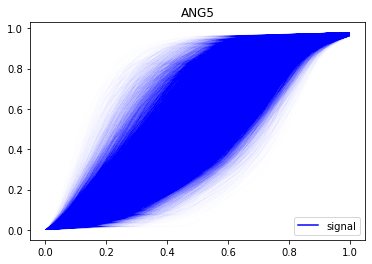

In [97]:
yList = [x*0.02 for x in range(50)] # попробовать pandas
xList = sig.iloc[sig.shape[0]-1,:50]
plt.plot(xList,yList, color='red')
plt.plot(xList,yList, color='blue',
             label = 'signal')
plt.plot(xList,yList, color='white', linewidth = 20)




for h in range (sig.shape[0]-2):
    xList = sig.iloc[h,:50]
    plt.plot(xList,yList, color='blue', linewidth=0.1,  alpha=0.05)
    
    if (h%5000 == 0):
        print('осталось  '+str(sig.shape[0]-h))
        
        
plt.legend(loc = 'lower right')        
plt.title('ANG5')

### 7.2. Отбор для bkg

In [98]:
bkg = pd.read_csv('simulated_background.csv')
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)

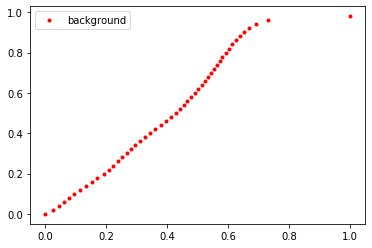

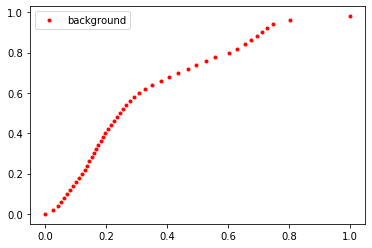

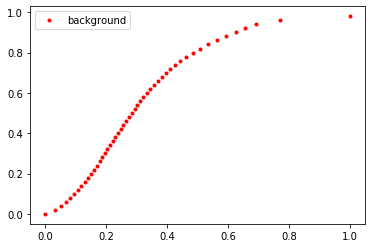

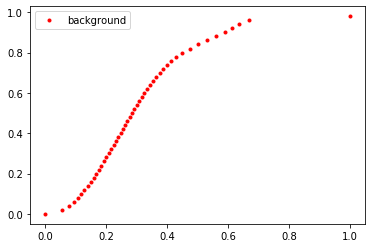

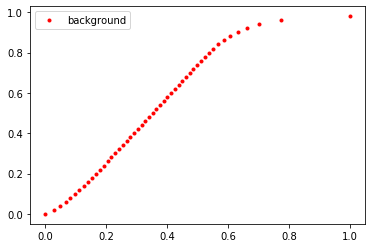

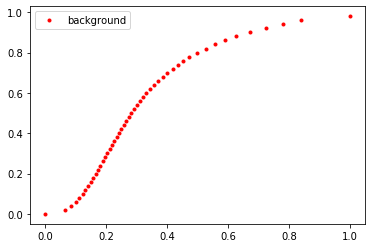

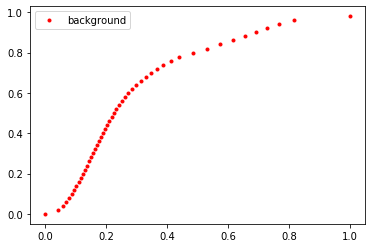

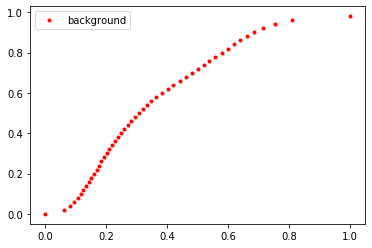

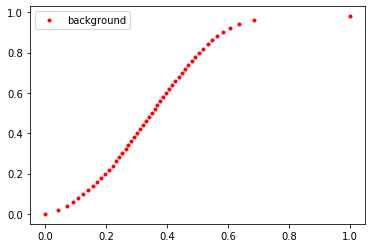

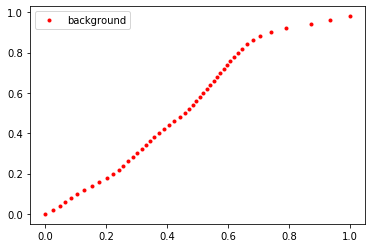

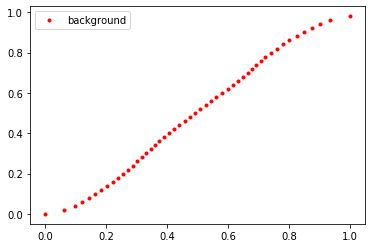

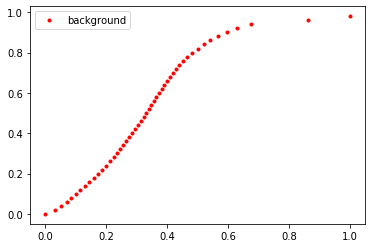

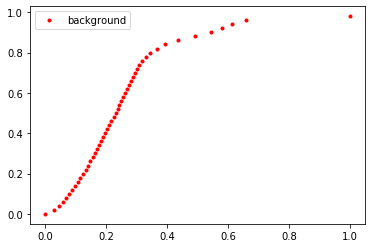

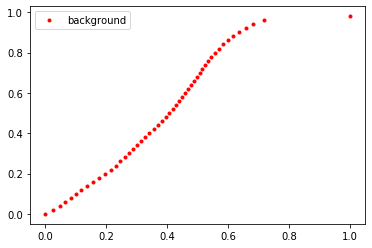

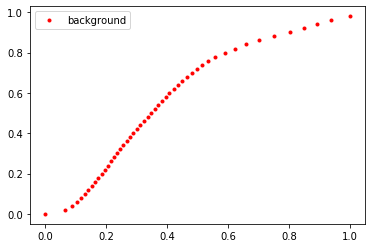

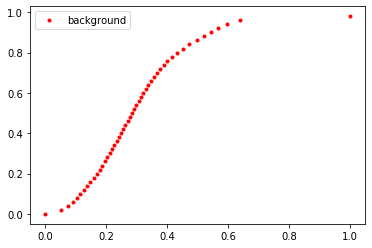

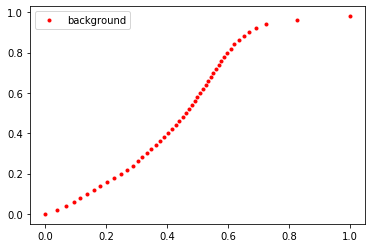

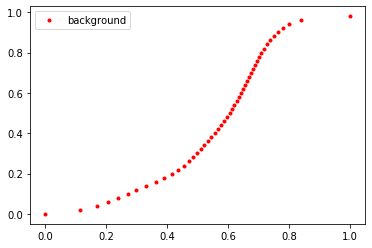

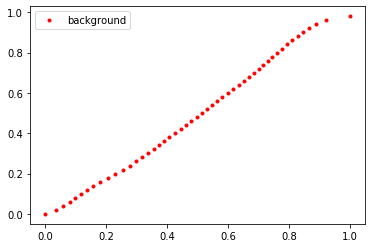

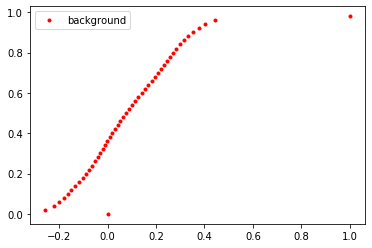

In [99]:
y = [x*0.02 for x in range(50)]
xList = np.array(bkg.iloc[:,:50])
for i in range(20):
    plt.plot(xList[i],y, '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

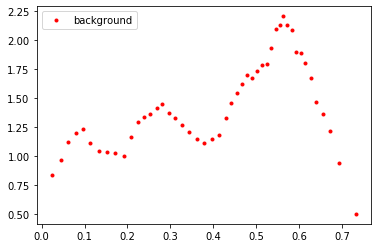

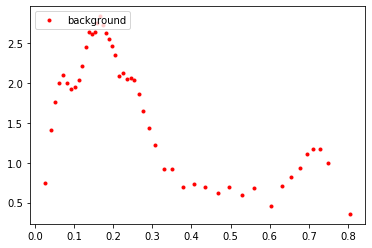

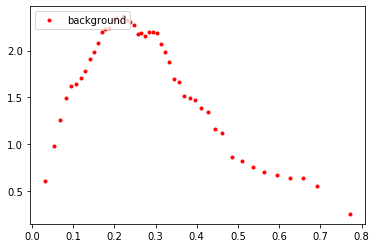

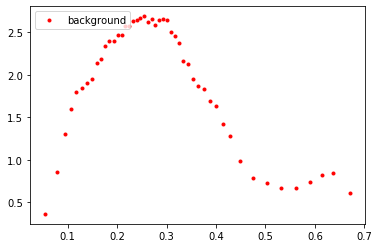

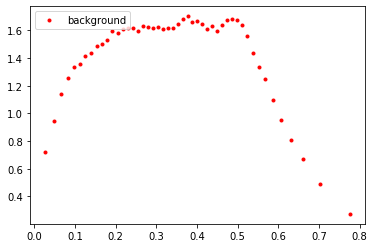

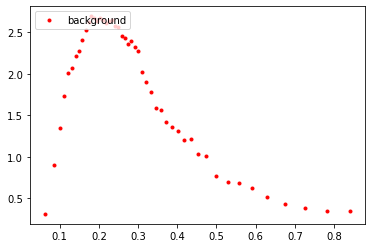

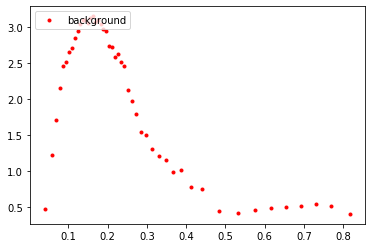

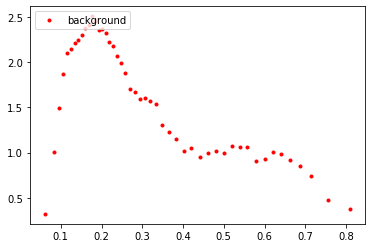

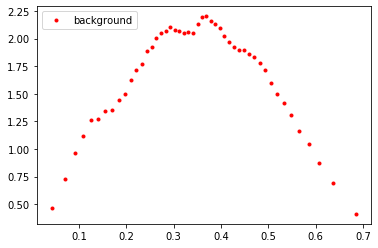

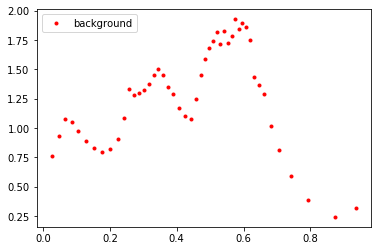

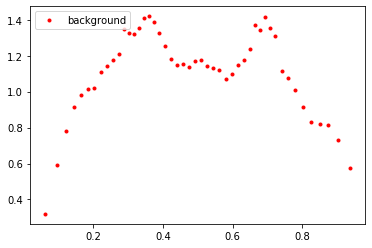

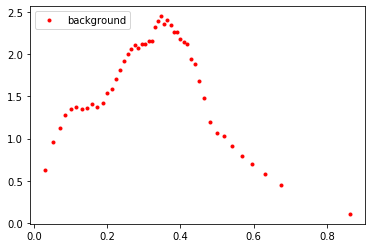

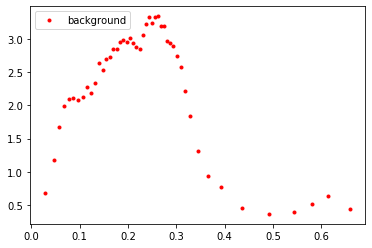

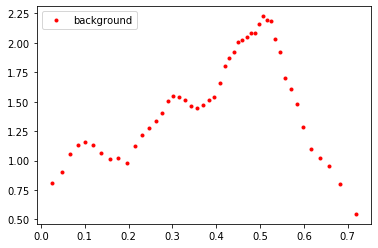

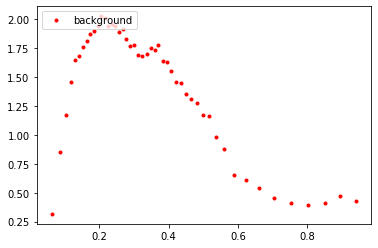

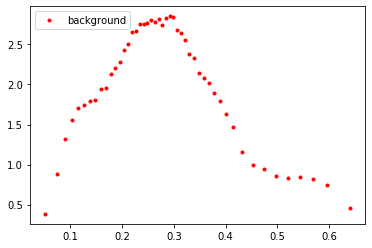

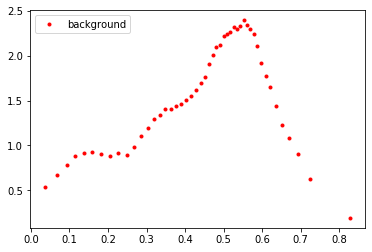

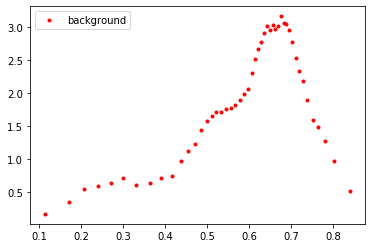

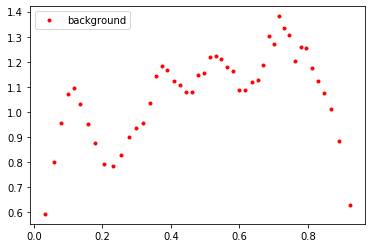

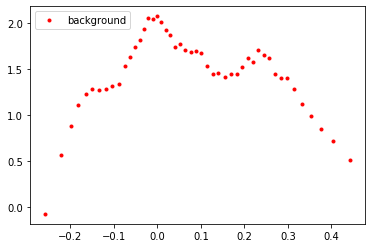

In [100]:
y = np.array(bkg.iloc[:,50:])
xList = np.array(bkg.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

In [101]:
bkg

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.023859,0.044619,0.062495,0.079217,0.095429,0.113411,0.132626,0.151980,0.171468,...,2.088145,1.897636,1.888686,1.805619,1.674654,1.466247,1.361048,1.219106,0.938600,0.499712
1,0,0.026669,0.040900,0.052281,0.062268,0.071800,0.081810,0.092163,0.102408,0.112209,...,0.678692,0.457736,0.706602,0.821297,0.939876,1.110341,1.171321,1.172712,0.999583,0.357541
2,0,0.032769,0.053213,0.069115,0.082528,0.094855,0.107039,0.118783,0.130041,0.140515,...,1.124353,0.858782,0.824127,0.750994,0.703108,0.668947,0.635555,0.634015,0.551630,0.254814
3,0,0.055085,0.078444,0.093737,0.106287,0.117434,0.128306,0.138792,0.149036,0.158411,...,1.274457,0.990062,0.788794,0.724011,0.668551,0.665613,0.741406,0.820567,0.843137,0.604139
4,0,0.027695,0.048869,0.066450,0.082341,0.097291,0.111993,0.126151,0.140064,0.153483,...,1.562915,1.437054,1.338380,1.249572,1.098450,0.952636,0.808585,0.670493,0.491357,0.273691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.294314,0.324724,0.345152,0.362187,0.377647,0.392270,0.407386,0.422496,0.437550,...,2.388683,2.090985,1.976014,1.865978,1.607805,1.272524,1.051249,0.801918,0.528583,0.185863
59996,0,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,...,0.994247,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891
59997,0,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,...,2.273998,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896
59998,0,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,...,0.959059,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908


In [102]:
for i in range(1, 51):
    bkg = bkg[(bkg['TimeAtHeightX' + str(i)] <= 1)]
    bkg = bkg[(bkg['TimeAtHeightX' + str(i)] >= 0)]

In [103]:
bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)
bkg.shape

(53774, 98)

In [104]:
bkg1 = bkg.iloc[:,:50]
yList = [x*0.02 for x in range(50)]
k = 0
for i in range(bkg1.shape[0]):
    try:
        if auc(bkg1.iloc[i,:], yList) > 0.9 or auc(bkg1.iloc[i,:], yList) < 0.1:
            bkg = bkg.drop(index=[i])
    except ValueError:
        bkg = bkg.drop(index=[i])
        print(i, end = ', ')
        k+=1
print('k = ', k)

23, 419, 581, 973, 1070, 1128, 1234, 2232, 2978, 3301, 3498, 3658, 3717, 3918, 3959, 4196, 4539, 5169, 5191, 6119, 6343, 6396, 6498, 6718, 7173, 7297, 7579, 7710, 7996, 8027, 8948, 9103, 9462, 9774, 11114, 11257, 12633, 12968, 13278, 14051, 15050, 15545, 16158, 16179, 16232, 16394, 16474, 16629, 16631, 17171, 18421, 18558, 18800, 19039, 19854, 20378, 20480, 20503, 20506, 20507, 20712, 20726, 21189, 21567, 22645, 22771, 22931, 23605, 23660, 24459, 24749, 24769, 24814, 25106, 25178, 25274, 26335, 26957, 29150, 29157, 29634, 30067, 30324, 30475, 30599, 30789, 30844, 30916, 31394, 31442, 32139, 32389, 32477, 33442, 33445, 34268, 34342, 34539, 34712, 36441, 37687, 38225, 38389, 39284, 39678, 40230, 40722, 41233, 41512, 41692, 42032, 42072, 42140, 42267, 43254, 43394, 43395, 43537, 43807, 44074, 45313, 45712, 45983, 46685, 47366, 47946, 48114, 48330, 48443, 48469, 49317, 50876, 51641, 52206, 52346, 52493, 52670, 52858, 53218, 53485, 53720, k =  141


In [105]:
bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)
bkg.shape

(53633, 98)

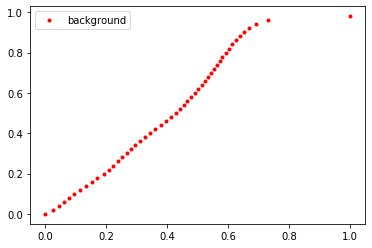

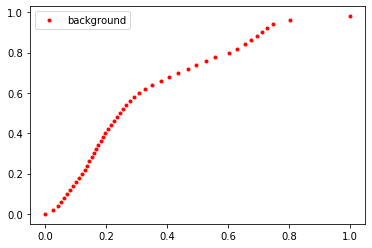

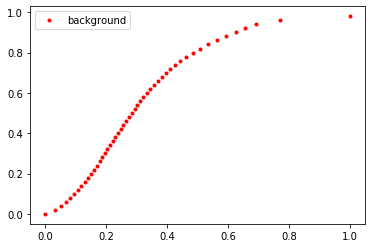

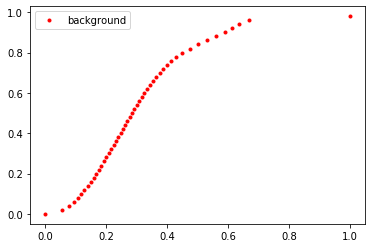

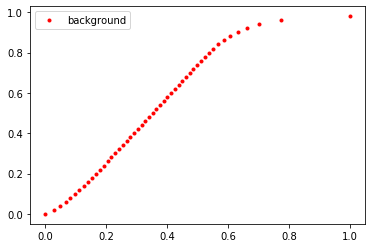

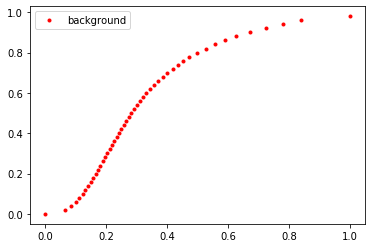

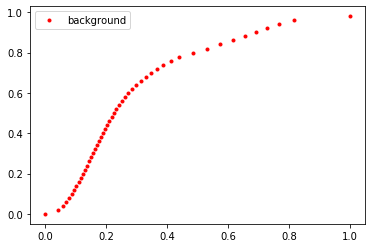

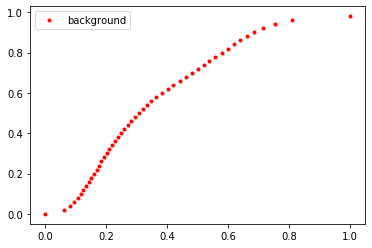

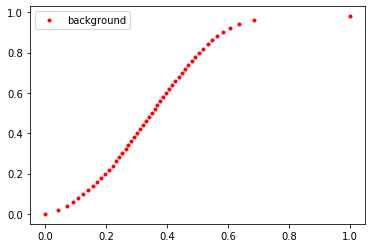

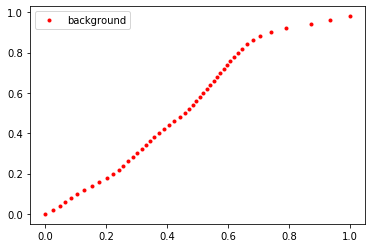

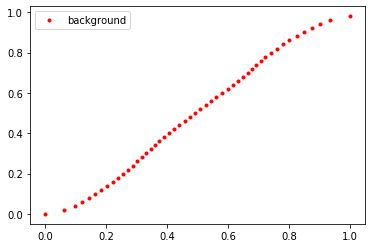

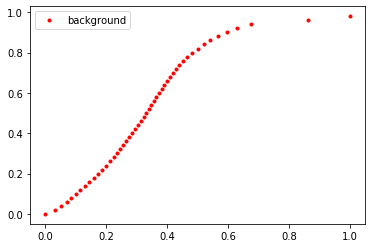

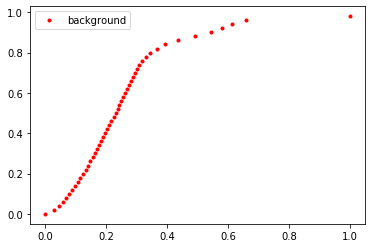

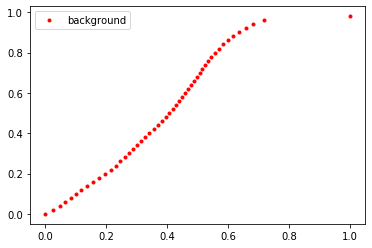

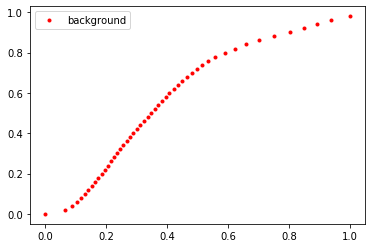

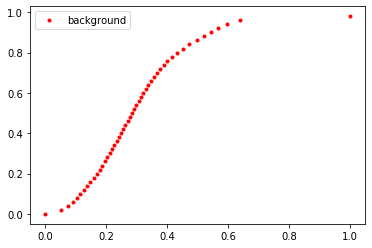

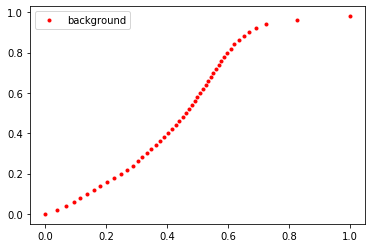

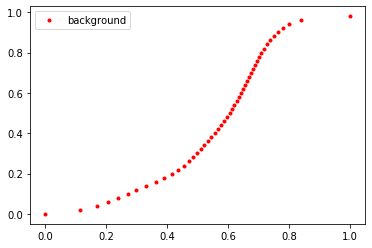

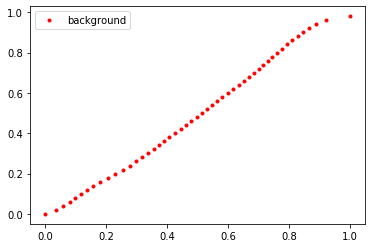

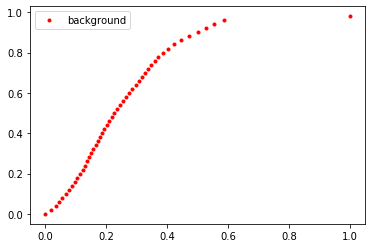

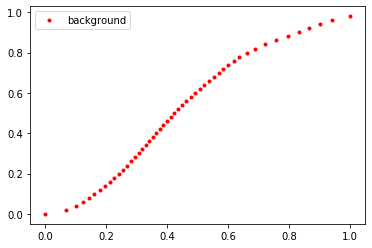

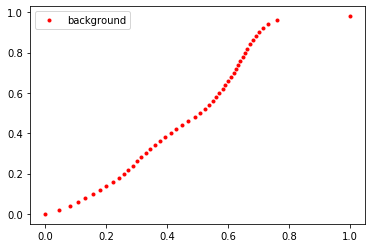

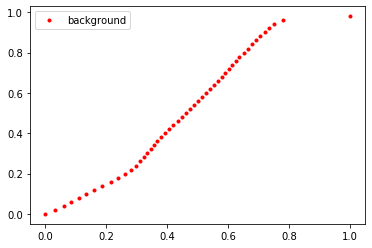

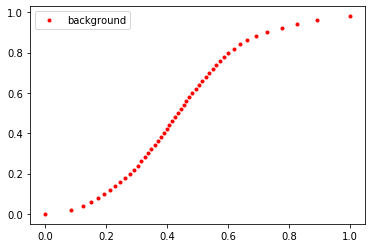

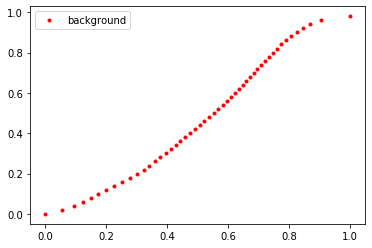

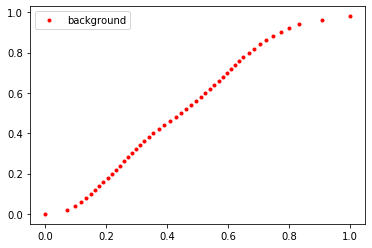

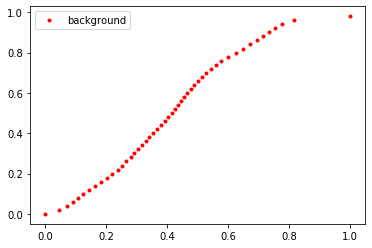

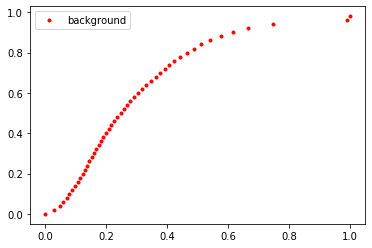

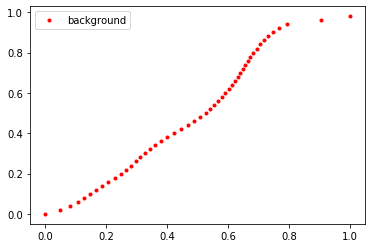

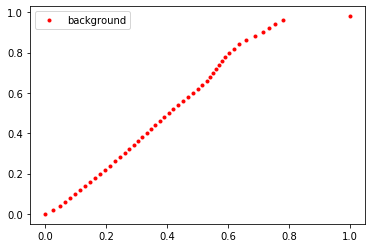

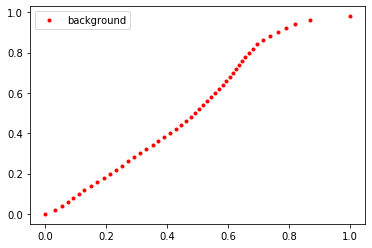

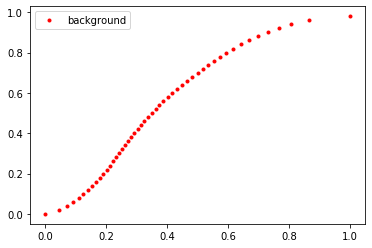

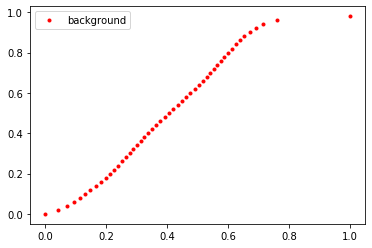

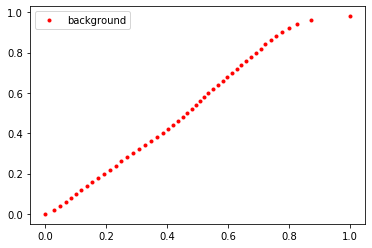

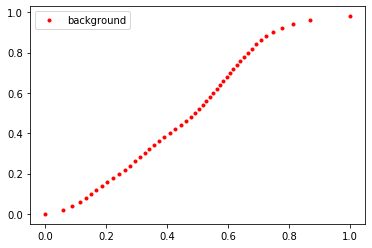

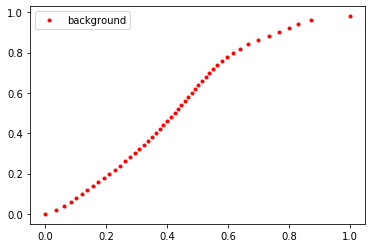

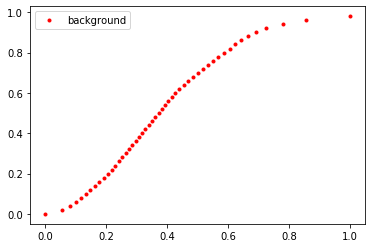

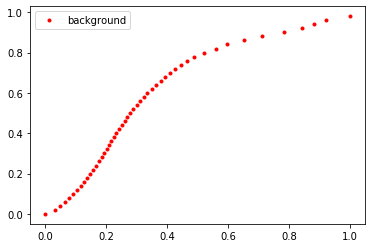

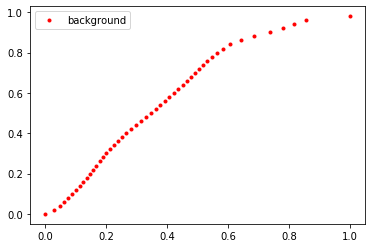

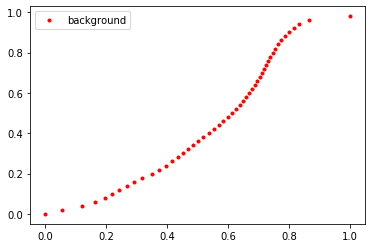

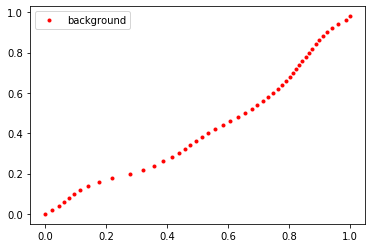

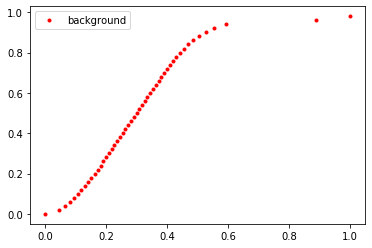

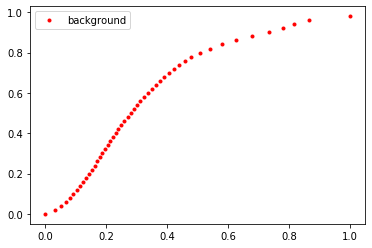

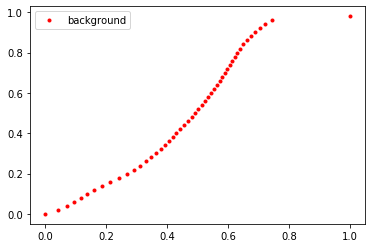

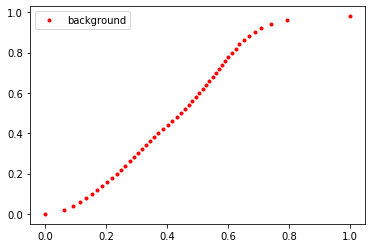

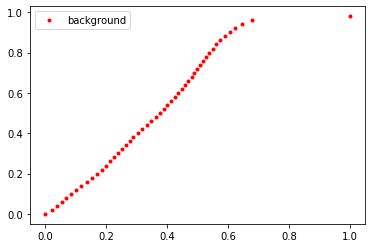

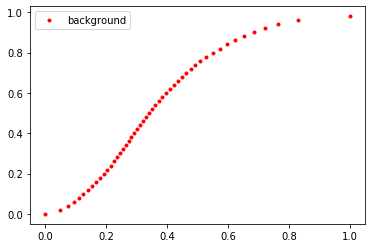

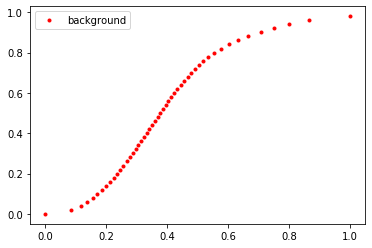

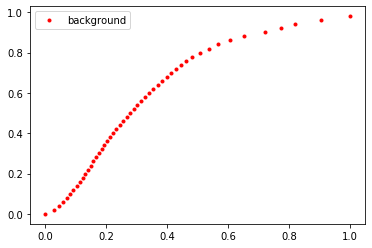

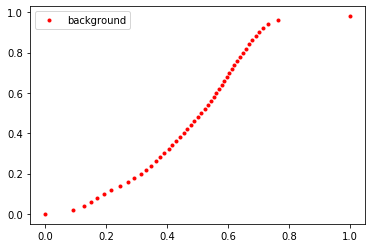

In [106]:
y = [x*0.02 for x in range(50)]
xList = np.array(bkg.iloc[:,:50])
for i in range(50):
    plt.plot(xList[i],y, '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

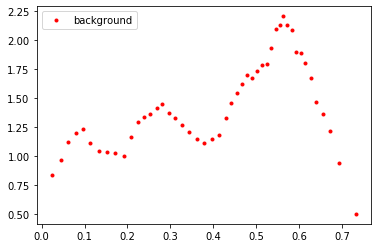

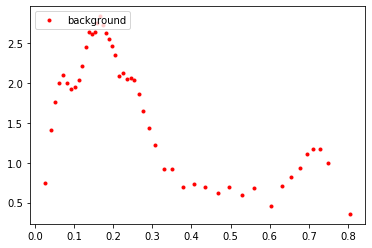

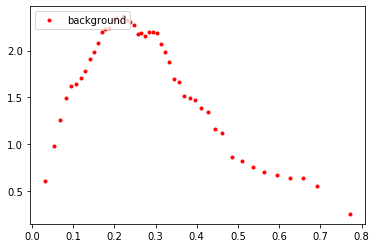

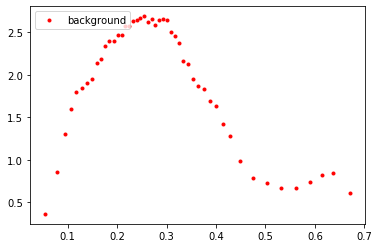

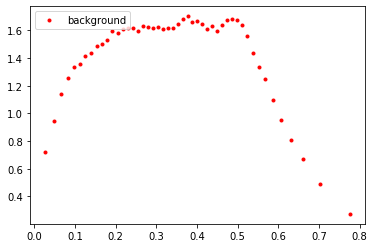

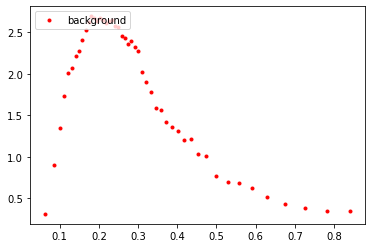

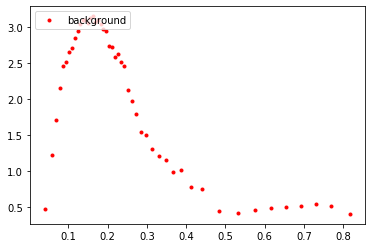

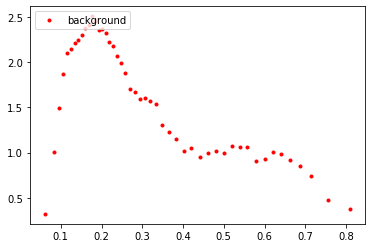

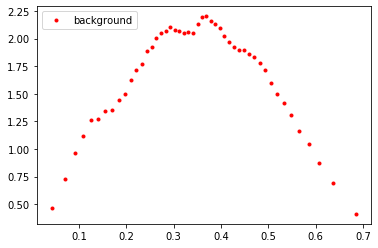

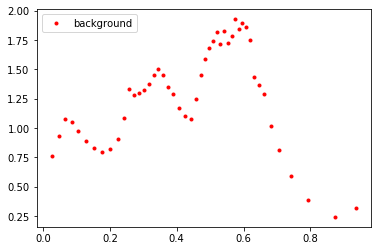

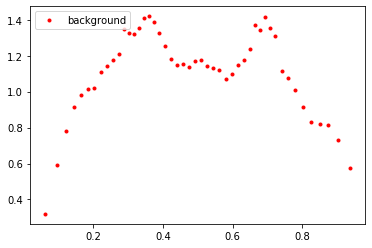

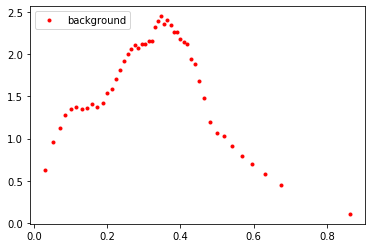

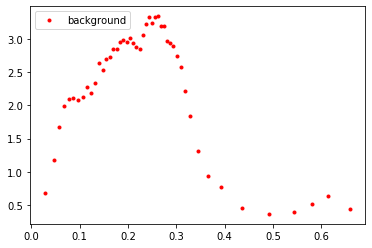

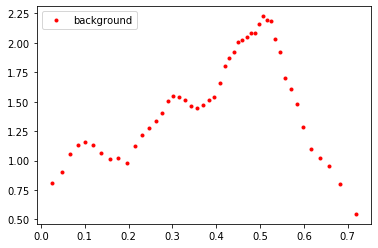

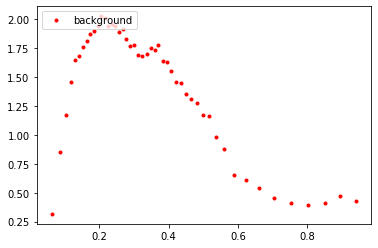

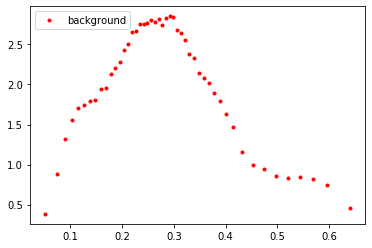

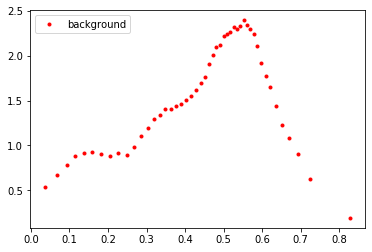

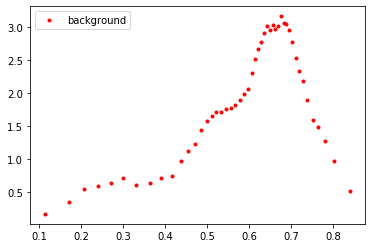

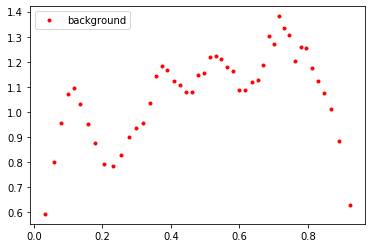

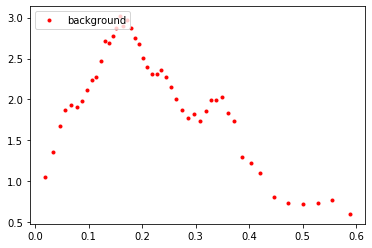

In [107]:
y = np.array(bkg.iloc[:,50:])
xList = np.array(bkg.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

осталось  53633
осталось  48633
осталось  43633
осталось  38633
осталось  33633
осталось  28633
осталось  23633
осталось  18633
осталось  13633
осталось  8633
осталось  3633


Text(0.5, 1.0, 'ANG5')

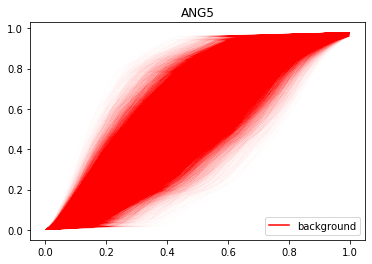

In [108]:
yList = [x*0.02 for x in range(50)] # попробовать pandas
xList = bkg.iloc[bkg.shape[0]-1,:50]
plt.plot(xList,yList, color='blue')
plt.plot(xList,yList, color='red',
             label = 'background')
plt.plot(xList,yList, color='white', linewidth = 20)




for h in range (bkg.shape[0]-2):
    xList = bkg.iloc[h,:50]
    plt.plot(xList,yList, color='red', linewidth=0.1,  alpha=0.05)
    
    if (h%5000 == 0):
        print('осталось  '+str(bkg.shape[0]-h))
        
        
plt.legend(loc = 'lower right')        
plt.title('ANG5')

### 7.3. Сохранение

In [109]:
sig['label'] = 1
bkg['label'] = 0

In [110]:
data = pd.concat([sig,bkg])

In [111]:
data = data.reset_index()
data.drop(data.columns[[0]], axis  =1, inplace = True)

In [112]:
data

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0,0.047859,0.084551,0.119299,0.155299,0.188761,0.223149,0.255443,0.288945,0.321843,...,1.540579,1.430623,1.270883,1.167746,1.011350,0.843084,0.706976,0.570329,0.470712,1
1,0,0.066097,0.122598,0.178579,0.227855,0.260765,0.286020,0.308475,0.330446,0.353333,...,2.390753,2.195069,2.012476,1.793677,1.571206,1.298550,0.967746,0.624266,0.389749,1
2,0,0.042451,0.080758,0.109641,0.133549,0.159071,0.185241,0.207271,0.228389,0.250128,...,1.877956,1.696454,1.521908,1.332911,1.236557,1.057073,0.906059,0.655561,0.456230,1
3,0,0.050162,0.081531,0.107799,0.136899,0.165083,0.188978,0.211104,0.232359,0.250481,...,1.235579,1.150491,1.049673,1.021887,0.971848,0.864543,0.629699,0.330931,0.235175,1
4,0,0.051562,0.084981,0.113827,0.140121,0.164231,0.187563,0.209352,0.231103,0.252877,...,1.478314,1.358085,1.159338,1.038692,0.872182,0.683760,0.543124,0.450250,0.332624,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105261,0,0.035229,0.060083,0.080566,0.099828,0.118521,0.137276,0.157294,0.177510,0.197362,...,1.819971,1.651582,1.467199,1.182612,0.924744,0.820752,0.780330,0.698185,0.549837,0
105262,0,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,...,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891,0
105263,0,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,...,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896,0
105264,0,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,...,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908,0


In [113]:
data.to_csv('example.csv')